Import necessary libraries to convert csv file into pandas dataframe ("pandas as pd") and pyplot and seaborn for plotting.

In [0]:
import os, zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

The below authenticates your Google account so that you can import the data from a linked spreadsheet and not a url.

In [0]:
!pip install --upgrade -q gspread
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
# Open our planets data sheet and read some data.
sheet = gc.open('planets.csv').sheet1

In [122]:
# get_all_values gives a list of rows.
rows = sheet.get_all_values()
print(rows[:10]) # slice only the first 10

[['# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['# Mon Apr  9 14:20:05 2018', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''

In [123]:
# Convert to a pandas DataFrame and render.
nasa_data = pd.DataFrame.from_records(rows)
print(len(nasa_data))

3861


In [0]:
nasa_planets = nasa_data[149 : ] # The first 149 rows are 'bad' because they don't have aligning columns as the actual data, so we're removing them.

In [125]:
nasa_planets.head()

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
149,loc_rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_sperr,st_splim,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim
150,3432,NN Ser,d,Eclipse Timing Variations,2,2883.5,182.5,-182.5,0,3.43,...,,0,,,,,,,,
151,3431,NN Ser,c,Eclipse Timing Variations,2,5573.55,102.2,-102.2,0,5.35,...,,0,,,,,,,,
152,3526,V0391 Peg,b,Pulsation Timing Variations,1,1170,44,-44,0,1.7,...,,0,,,,,,,,
153,1085,KOI-55,c,Orbital Brightness Modulation,2,0.342887,0.000013,-0.000013,0,0.0076,...,,,1.36,0.055,-0.063,0,-0.106,,,0


Looks kind of ugly, doesn't it? There are a few things wrong with this table -- the columns aren't named (there are undescriptive numbers), the indices start at 70 and not 0. We can fix that using pandas commands!

In [0]:
nasa_planets = nasa_planets.reset_index() # set index to 0

In [127]:
nasa_planets.head()

,index,0,1,2,3,4,5,6,7,8,...,134,135,136,137,138,139,140,141,142,143
0,149,loc_rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,...,st_sperr,st_splim,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim
1,150,3432,NN Ser,d,Eclipse Timing Variations,2,2883.5,182.5,-182.5,0,...,,0,,,,,,,,
2,151,3431,NN Ser,c,Eclipse Timing Variations,2,5573.55,102.2,-102.2,0,...,,0,,,,,,,,
3,152,3526,V0391 Peg,b,Pulsation Timing Variations,1,1170,44,-44,0,...,,0,,,,,,,,
4,153,1085,KOI-55,c,Orbital Brightness Modulation,2,0.342887,0.000013,-0.000013,0,...,,,1.36,0.055,-0.063,0,-0.106,,,0


In [0]:
nasa_planets.drop(columns = ["index"], inplace = True)
nasa_planets.columns = nasa_data.loc[149] # the columns are actually the row at the end of the ones we cut out (i.e. Row 150)
nasa_planets = nasa_planets.iloc[1:]

In [129]:
nasa_planets.head()

149,loc_rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_sperr,st_splim,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim
1,3432,NN Ser,d,Eclipse Timing Variations,2,2883.5,182.5,-182.5,0,3.43,...,,0,,,,,,,,
2,3431,NN Ser,c,Eclipse Timing Variations,2,5573.55,102.2,-102.2,0,5.35,...,,0,,,,,,,,
3,3526,V0391 Peg,b,Pulsation Timing Variations,1,1170,44,-44,0,1.7,...,,0,,,,,,,,
4,1085,KOI-55,c,Orbital Brightness Modulation,2,0.342887,0.000013,-0.000013,0,0.0076,...,,,1.36,0.055,-0.063,0,-0.106,,,0
5,1084,KOI-55,b,Orbital Brightness Modulation,2,0.240104,0.000004,-0.000004,0,0.006,...,,,1.36,0.055,-0.063,0,-0.106,,,0


In [130]:
len(nasa_planets.columns) # number of columns in DataFrame

144

In [131]:
nasa_planets["pl_letter"].head()

1    d
2    c
3    b
4    c
5    b
Name: pl_letter, dtype: object

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


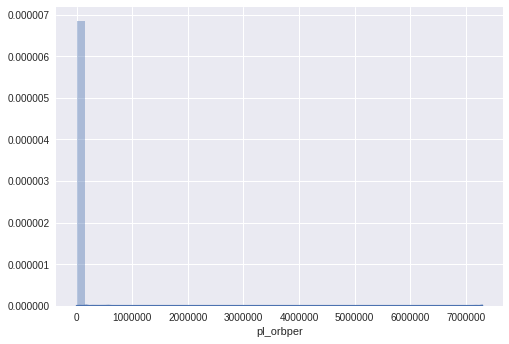

In [132]:
nasa_planets["pl_orbper"].fillna(-10000, inplace = True)
nasa_planets['pl_orbper']=nasa_planets["pl_orbper"].convert_objects(convert_numeric = True)
sns.distplot(nasa_planets.loc[(nasa_planets["pl_orbper"] != -10000) & (nasa_planets["pl_orbper"] >= 0)]["pl_orbper"])
plt.show()

In [133]:
nasa_planets['pl_orbper']=nasa_planets["pl_orbper"].convert_objects(convert_numeric = True).fillna(-10000000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [134]:
nasa_planets['st_lum']=nasa_planets["st_lum"].convert_objects(convert_numeric = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [0]:
radius_inner=np.sqrt(10**nasa_planets['st_lum']/1.1)
radius_outter=np.sqrt(10**nasa_planets['st_lum']/.53)
st_lum=nasa_planets['st_lum']

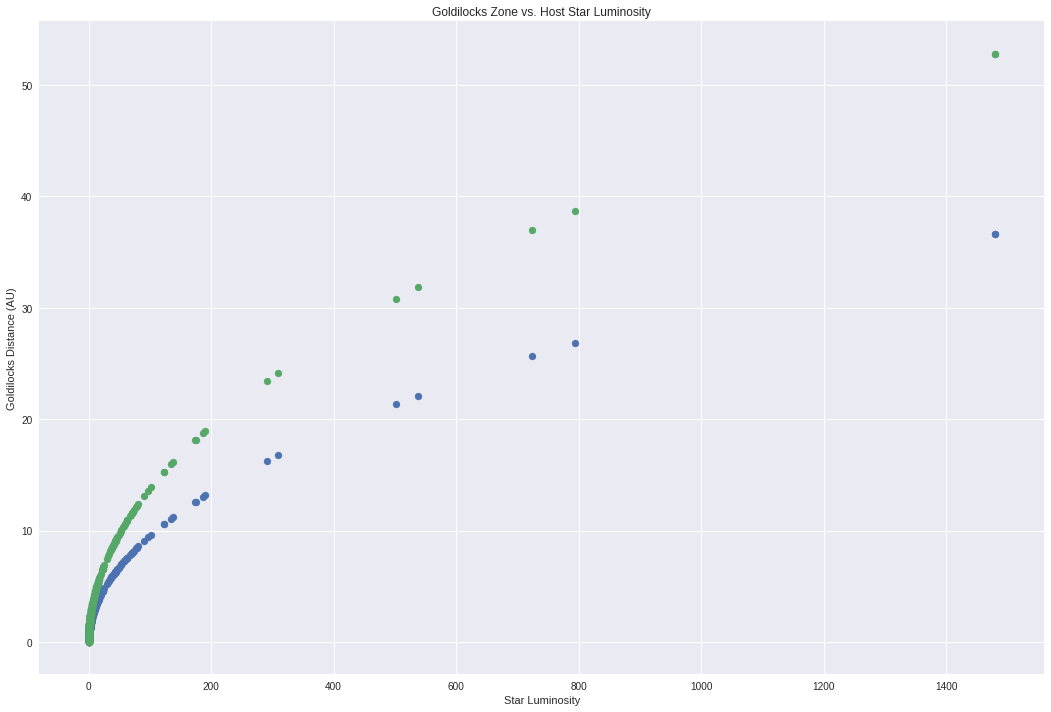

In [136]:
fig = plt.gcf()
fig.set_size_inches(18, 12)

plt.scatter(10**st_lum,radius_inner)
plt.scatter(10**st_lum,radius_outter)
plt.xlabel("Star Luminosity")
plt.ylabel("Goldilocks Distance (AU)")
plt.title("Goldilocks Zone vs. Host Star Luminosity")
plt.show()

In [137]:
# checking data to make sure everything we need for the goldilocks plots is there
nasa_planets.columns

Index(['loc_rowid', 'pl_hostname', 'pl_letter', 'pl_discmethod', 'pl_pnum',
       'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
       'pl_orbsmax',
       ...
       'st_sperr', 'st_splim', 'st_lum', 'st_lumerr1', 'st_lumerr2',
       'st_lumlim', 'st_metfe', 'st_metfeerr1', 'st_metfeerr2', 'st_metfelim'],
      dtype='object', name=149, length=144)

In [138]:
# what we'll need to approximate habitable zone
# inputs: Lstar / Lsun = absolute luminosity
# outputs: r_i = inner boundary of CHZ, r_o = outer boundary of CHZ

# checking luminosity column
nasa_planets["st_lum"].head()

1     NaN
2     NaN
3     NaN
4    1.36
5    1.36
Name: st_lum, dtype: float64

In [139]:
# clean column
nasa_planets["st_lum"].fillna(-1000000, inplace = True)
nasa_planets["st_lum"].head()

1   -1000000.00
2   -1000000.00
3   -1000000.00
4          1.36
5          1.36
Name: st_lum, dtype: float64

In [0]:
lum_goldilocks = nasa_planets["st_lum"]

In [141]:
# convert units out of log(Solar)
lum_goldilocks = 10 ** lum_goldilocks
lum_goldilocks.head()

1     0.000000
2     0.000000
3     0.000000
4    22.908677
5    22.908677
Name: st_lum, dtype: float64

In [0]:
nasa_planets["lum_goldilocks"] = lum_goldilocks

In [143]:
nasa_planets["CHZ_outer"] = np.sqrt(lum_goldilocks / 0.53)
nasa_planets["CHZ_inner"] = np.sqrt(lum_goldilocks / 1.1)
nasa_planets.head()

149,loc_rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_lumerr1,st_lumerr2,st_lumlim,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim,lum_goldilocks,CHZ_outer,CHZ_inner
1,3432,NN Ser,d,Eclipse Timing Variations,2,2883.500000,182.5,-182.5,0,3.43,...,,,,,,,,0.000000,0.00000,0.000000
2,3431,NN Ser,c,Eclipse Timing Variations,2,5573.550000,102.2,-102.2,0,5.35,...,,,,,,,,0.000000,0.00000,0.000000
3,3526,V0391 Peg,b,Pulsation Timing Variations,1,1170.000000,44,-44,0,1.7,...,,,,,,,,0.000000,0.00000,0.000000
4,1085,KOI-55,c,Orbital Brightness Modulation,2,0.342887,0.000013,-0.000013,0,0.0076,...,0.055,-0.063,0,-0.106,,,0,22.908677,6.57449,4.563559
5,1084,KOI-55,b,Orbital Brightness Modulation,2,0.240104,0.000004,-0.000004,0,0.006,...,0.055,-0.063,0,-0.106,,,0,22.908677,6.57449,4.563559


In [144]:
nasa_planets["pl_orbsmax"] = nasa_planets["pl_orbsmax"].convert_objects(convert_numeric = True)
goldilocks_planets = nasa_planets.loc[ (nasa_planets["pl_orbsmax"] <= nasa_planets["CHZ_outer"]) & (nasa_planets["pl_orbsmax"] >= nasa_planets["CHZ_inner"]) ]
goldilocks_planets.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


149,loc_rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_lumerr1,st_lumerr2,st_lumlim,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim,lum_goldilocks,CHZ_outer,CHZ_inner
174,536,HD 221287,b,Radial Velocity,1,456.1,7.7,-5.8,0,1.25,...,,,0,-0.03,0.05,-0.05,0,1.659587,1.769547,1.228298
219,352,HD 13908,c,Radial Velocity,2,931.0,17,-17,0,2.03,...,,,0,0.01,0.04,-0.04,0,3.999447,2.747022,1.906793
277,700,HD 86264,b,Radial Velocity,1,1475.0,55,-55,0,2.86,...,0.1,-0.1,0,0.202,0.04,-0.04,0,4.570882,2.936717,2.038467
493,541,HD 224538,b,Radial Velocity,1,1189.1,5.1,-5.1,0,2.28,...,0.024,-0.026,0,0.27,0.1,-0.1,0,2.951209,2.359729,1.637961
622,365,HD 142415,b,Radial Velocity,1,386.3,1.6,-1.6,0,1.05,...,,,0,0.21,,,0,1.148154,1.471845,1.021654


In [145]:
print("Goldilocks Zone: " + str(len(goldilocks_planets))) # number of planets lying in goldilocks zone
print("All Planets: " + str(len(nasa_planets)))
print("Percent of Goldilocks Planets: " + str(len(goldilocks_planets) / len(nasa_planets) * 100))

Goldilocks Zone: 39
All Planets: 3711
Percent of Goldilocks Planets: 1.0509296685529508


In [146]:
# quantifying position within Goldilocks zone
goldilocks_planets["range_pos"] = (goldilocks_planets["pl_orbsmax"] - goldilocks_planets["CHZ_inner"])
zone_width = (goldilocks_planets["CHZ_outer"] - goldilocks_planets["CHZ_inner"])
goldilocks_planets.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


149,loc_rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_lumerr2,st_lumlim,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim,lum_goldilocks,CHZ_outer,CHZ_inner,range_pos
174,536,HD 221287,b,Radial Velocity,1,456.1,7.7,-5.8,0,1.25,...,,0,-0.03,0.05,-0.05,0,1.659587,1.769547,1.228298,0.021702
219,352,HD 13908,c,Radial Velocity,2,931.0,17,-17,0,2.03,...,,0,0.01,0.04,-0.04,0,3.999447,2.747022,1.906793,0.123207
277,700,HD 86264,b,Radial Velocity,1,1475.0,55,-55,0,2.86,...,-0.1,0,0.202,0.04,-0.04,0,4.570882,2.936717,2.038467,0.821533
493,541,HD 224538,b,Radial Velocity,1,1189.1,5.1,-5.1,0,2.28,...,-0.026,0,0.27,0.1,-0.1,0,2.951209,2.359729,1.637961,0.642039
622,365,HD 142415,b,Radial Velocity,1,386.3,1.6,-1.6,0,1.05,...,,0,0.21,,,0,1.148154,1.471845,1.021654,0.028346


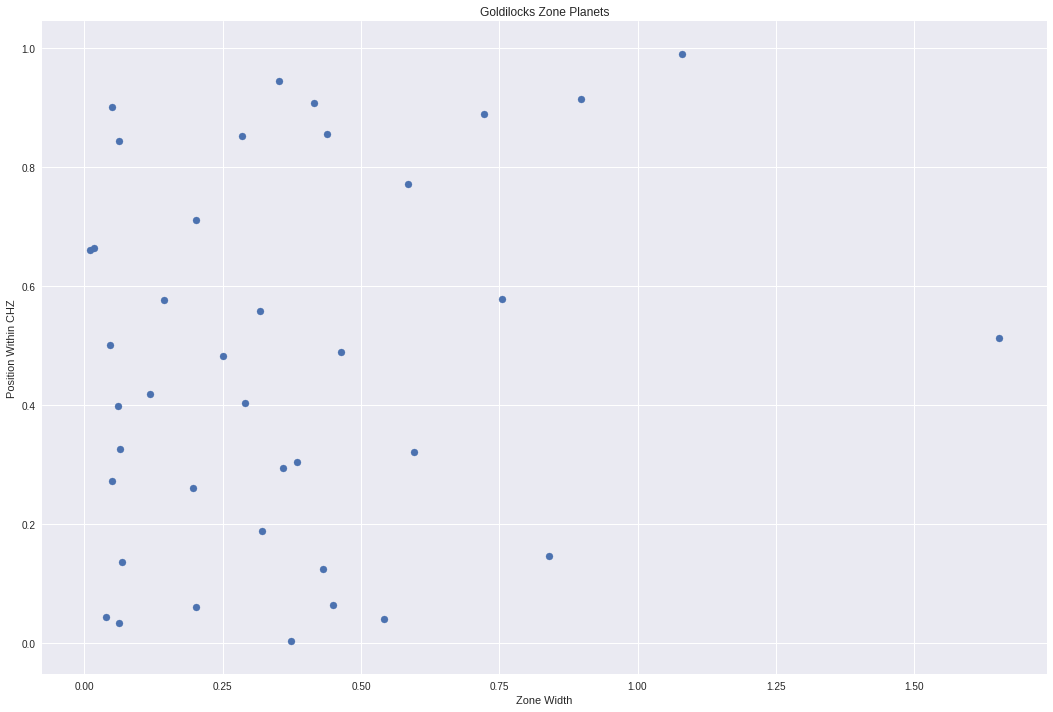

In [147]:
fig = plt.gcf()
fig.set_size_inches(18, 12)


plt.scatter(zone_width, goldilocks_planets["range_pos"] / zone_width)
plt.xlabel("Zone Width")
plt.ylabel("Position Within CHZ")
plt.title("Goldilocks Zone Planets")
plt.show()

In [0]:
x = nasa_planets.loc[(nasa_planets["CHZ_outer"] - nasa_planets["CHZ_inner"] > 0) & (nasa_planets["pl_orbsmax"] - nasa_planets["CHZ_inner"] > 0)]
all_zone_width = x["CHZ_outer"] - x["CHZ_inner"]
all_range_pos = (x["pl_orbsmax"] - x["CHZ_inner"]) / all_zone_width

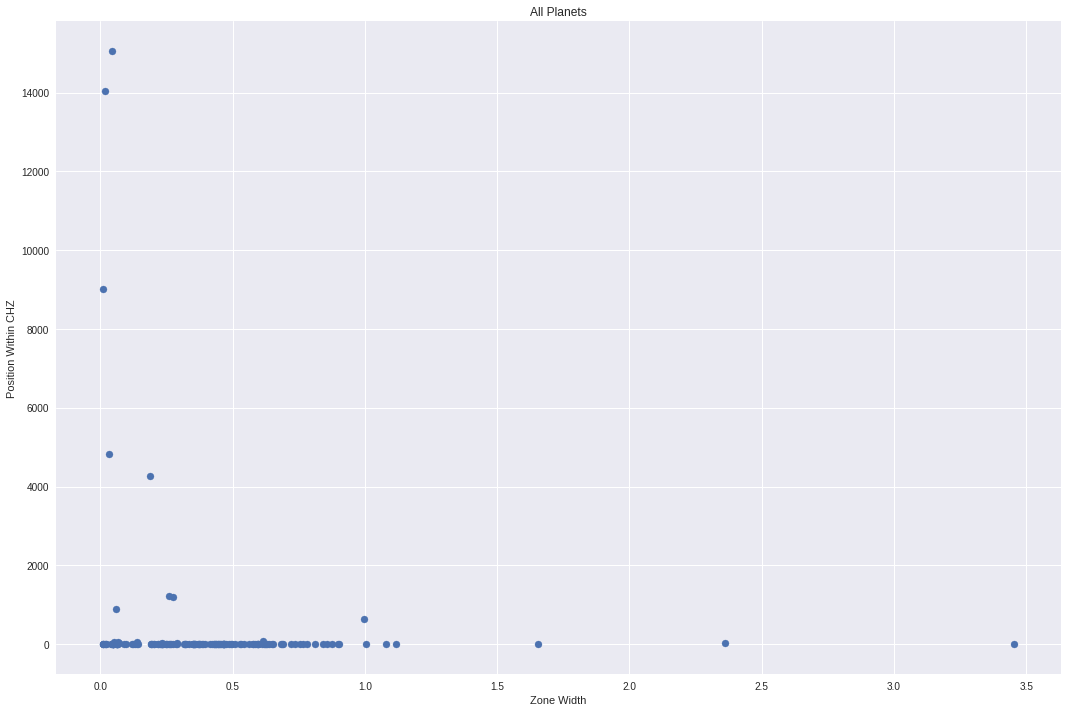

In [149]:
fig = plt.gcf()
fig.set_size_inches(18, 12)



plt.scatter(all_zone_width, all_range_pos)
plt.xlabel("Zone Width")
plt.ylabel("Position Within CHZ")
plt.title("All Planets")
plt.show()

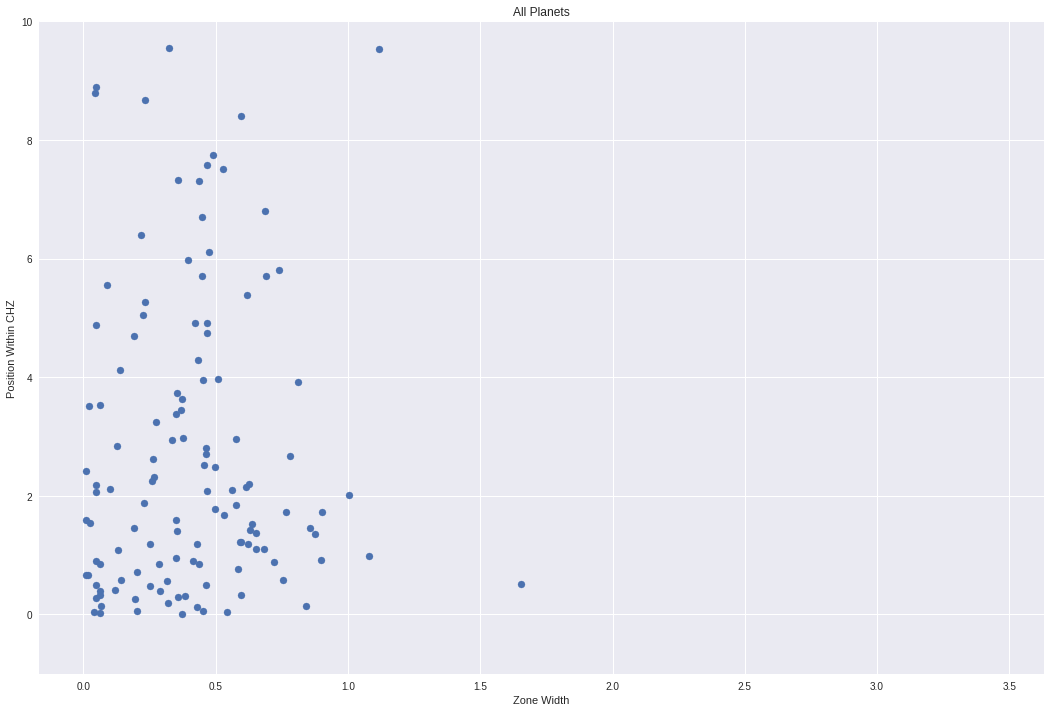

In [150]:
fig = plt.gcf()
fig.set_size_inches(18, 12)


plt.scatter(all_zone_width, all_range_pos)
plt.xlabel("Zone Width")
plt.ylabel("Position Within CHZ")
plt.title("All Planets")
plt.ylim([-1, 10])
plt.show()

Other than analyzing whether or not a planet is in the Goldilocks zone, it's a good idea to take a look at density (rocky vs. gaseous planet) and estimated temperature. We can take a look at whether or not the planets well within their respective zones satisfy these other habitability criteria.

In [151]:
nasa_planets.columns # checking on the columns again

Index(['loc_rowid', 'pl_hostname', 'pl_letter', 'pl_discmethod', 'pl_pnum',
       'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
       'pl_orbsmax',
       ...
       'st_lumerr1', 'st_lumerr2', 'st_lumlim', 'st_metfe', 'st_metfeerr1',
       'st_metfeerr2', 'st_metfelim', 'lum_goldilocks', 'CHZ_outer',
       'CHZ_inner'],
      dtype='object', name=149, length=147)

In [152]:
# how does the density info look like?
nasa_planets["pl_dens"].head()

1    
2    
3    
4    
5    
Name: pl_dens, dtype: object

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


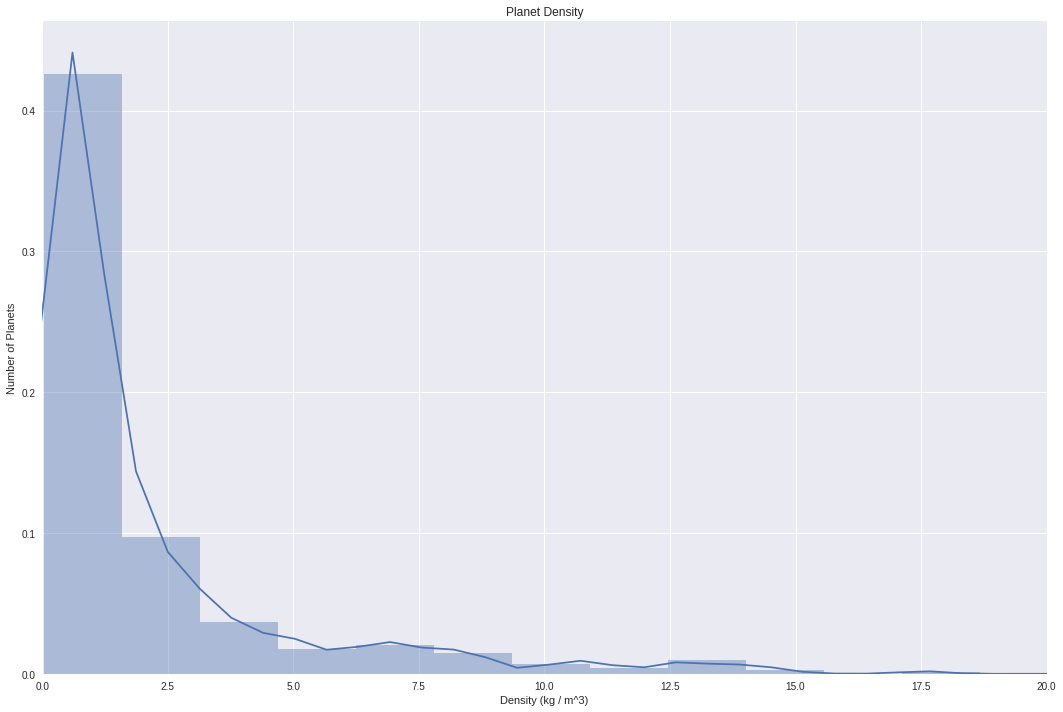

In [153]:
# it looks like some of this data isn't recorded...
# let's plot a std plot of density
fig = plt.gcf()
fig.set_size_inches(18, 12)
dens_frame = nasa_planets
dens_frame["pl_dens"].dropna(inplace = True)
dens_frame["pl_bmassj"].dropna(inplace = True)
dens_frame["pl_dens"].fillna(-100000, inplace = True)
dens_frame["pl_bmassj"].fillna(-100000, inplace = True)
dens_frame["pl_dens"] = dens_frame["pl_dens"].convert_objects(convert_numeric = True) # convert densities to numeric data
dens_frame["pl_bmassj"] = dens_frame["pl_bmassj"].convert_objects(convert_numeric = True)
sns.distplot(dens_frame.loc[dens_frame["pl_dens"] > -100000]["pl_dens"])
plt.title("Planet Density")
plt.xlim([0, 20])
plt.xlabel("Density (kg / m^3)")
plt.ylabel("Number of Planets")
plt.show()

Most planet densities aren't available [potential source of future analysis]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can 

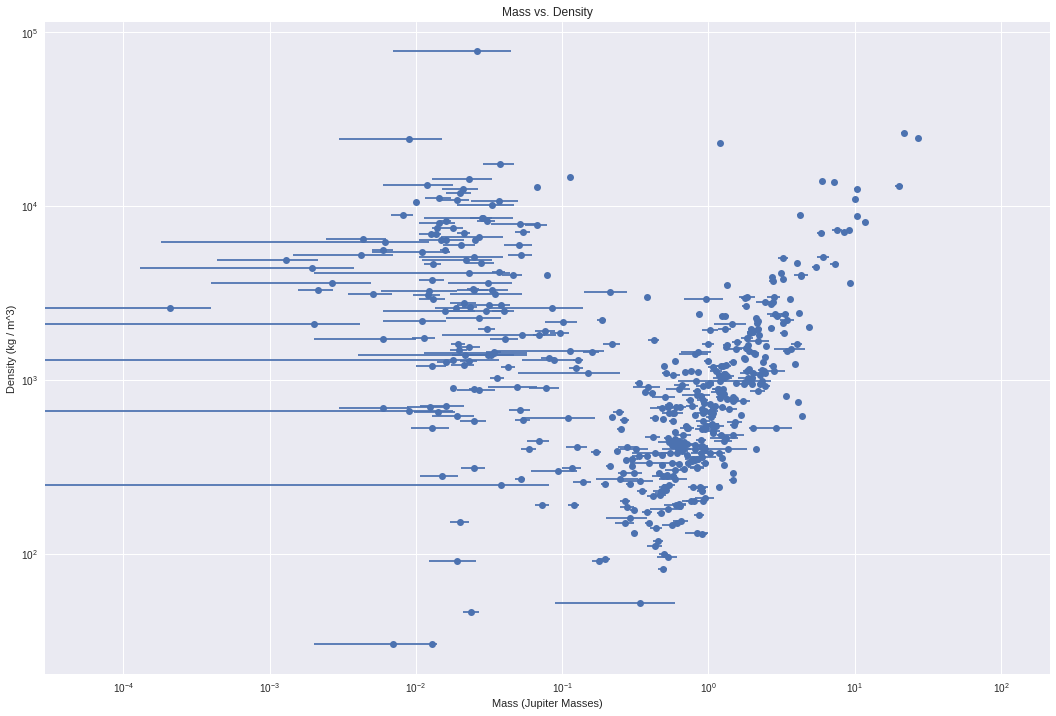

In [154]:
# mass vs. density graph
# convert densities to kg / m^3 units
dens_frame["pl_massj"] = dens_frame["pl_massj"].convert_objects(convert_numeric = True)
dens_frame["pl_massjerr1"] = dens_frame["pl_massjerr1"].convert_objects(convert_numeric = True)
dens_frame["pl_massjerr2"] = dens_frame["pl_massjerr2"].convert_objects(convert_numeric = True)
dens_frame["pl_denserr1"] = dens_frame["pl_denserr1"].convert_objects(convert_numeric = True)
dens_frame["pl_denserr2"] = dens_frame["pl_denserr2"].convert_objects(convert_numeric = True)
dens_frame = dens_frame.fillna(0)
dens_data = dens_frame["pl_dens"] / 1000 * (100)**3
avail_masses = dens_frame["pl_massj"]
# log transform
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(18, 12)
ax.set_yscale('log')
ax.set_xscale('log')

xerr = np.array(dens_frame["pl_massjerr1"], dens_frame["pl_massjerr2"])
yerr = np.array(dens_frame["pl_denserr1"], dens_frame["pl_denserr2"])
#plt.scatter(x = avail_masses, y = dens_data)
plt.errorbar(avail_masses, dens_data, xerr = xerr, yerr = yerr, fmt='o')
plt.xlabel('Mass (Jupiter Masses)')
plt.ylabel('Density (kg / m^3)')

plt.title('Mass vs. Density')

plt.show()

In [155]:
dens_frame.loc[dens_frame["pl_bmassj"] > 0.1]

149,loc_rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_lumerr1,st_lumerr2,st_lumlim,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim,lum_goldilocks,CHZ_outer,CHZ_inner
1,3432,NN Ser,d,Eclipse Timing Variations,2,2.883500e+03,182.5,-182.5,0,3.430000,...,,,,,,,,0.000000,0.000000,0.000000
2,3431,NN Ser,c,Eclipse Timing Variations,2,5.573550e+03,102.2,-102.2,0,5.350000,...,,,,,,,,0.000000,0.000000,0.000000
3,3526,V0391 Peg,b,Pulsation Timing Variations,1,1.170000e+03,44,-44,0,1.700000,...,,,,,,,,0.000000,0.000000,0.000000
9,3691,kap And,b,Imaging,1,-1.000000e+07,,,,55.000000,...,0.04,-0.04,0,-0.36,0.09,-0.09,0,67.608298,11.294371,7.839776
10,757,HIP 78530,b,Imaging,1,-1.000000e+07,,,,740.000000,...,,,,,,,,0.000000,0.000000,0.000000
12,1058,KELT-9,b,Transit,1,1.481124e+00,0.0000011,-0.0000011,0,0.034620,...,0.095,-0.101,0,-0.03,0.2,-0.2,0,52.966344,9.996824,6.939108
13,749,HIP 65426,b,Imaging,1,-1.000000e+07,,,0,92.000000,...,,,0,,,,0,0.000000,0.000000,0.000000
14,1050,KELT-20,b,Transit,1,3.474108e+00,0.0000019,-0.0000019,0,0.054200,...,0.069,-0.07,0,-0.29,0.22,-0.36,0,12.705741,4.896233,3.398628
16,1072,KOI-13,b,Transit,1,1.763588e+00,0.000001,-0.000001,0,0.036410,...,,,,0.2,0.2,-0.2,0,0.000000,0.000000,0.000000
17,1051,KELT-21,b,Transit,1,3.612765e+00,0.0000033,-0.0000033,0,0.052240,...,0.028,-0.03,0,-0.405,0.032,-0.033,0,8.035261,3.893696,2.702736


In [156]:
# now let's see if we can analyze temperature
temps = nasa_planets['pl_eqt']
temps.head()

1    
2    
3    
4    
5    
Name: pl_eqt, dtype: object

In [157]:
dens_frame["pl_eqt"].dropna(inplace = True)
dens_frame["pl_eqt"] = dens_frame["pl_eqt"].convert_objects(convert_numeric = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


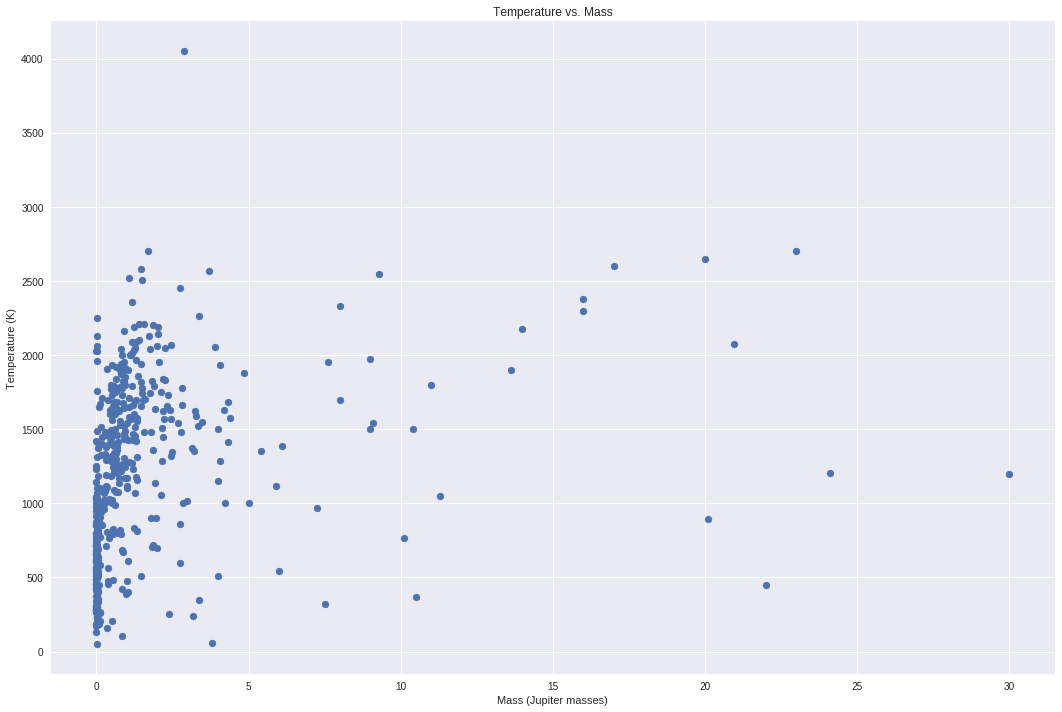

In [158]:
# take a look at this paper: https://arxiv.org/pdf/1604.08864.pdf
fig = plt.gcf()
fig.set_size_inches(18, 12)
plt.scatter(dens_frame["pl_bmassj"], dens_frame["pl_eqt"])
plt.xlabel("Mass (Jupiter masses)")
plt.ylabel("Temperature (K)")
plt.title('Temperature vs. Mass')
plt.show()

In [159]:
# temperature range of liquid water / life: -15-115 degrees C
# check this out: https://www.lpi.usra.edu/education/explore/our_place/hab_ref_table.pdf
upper_lim = 115 + 273
lower_lim = -15 + 273
viable_temp_planets = dens_frame.loc[(dens_frame["pl_eqt"] <= upper_lim) & (dens_frame["pl_eqt"] >= lower_lim)]
viable_temp_planets.head()

149,loc_rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_lumerr1,st_lumerr2,st_lumlim,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim,lum_goldilocks,CHZ_outer,CHZ_inner
667,2768,Kepler-51,d,Transit,3,130.19400,0.005,-0.002,,0.5090,...,,,,-0.079,,,0,0.000000,0.000000,0.000000
1184,2807,Kepler-539,b,Transit,2,125.63243,0.00071,-0.00071,0,0.4988,...,,,,-0.01,0.07,-0.07,0,0.000000,0.000000,0.000000
1363,2694,Kepler-452,b,Transit,1,384.84300,0.007,-0.012,0,1.0460,...,,,,0.21,0.09,-0.09,0,0.000000,0.000000,0.000000
1460,618,HD 42618,b,Radial Velocity,1,149.61000,0.37,-0.34,0,0.5540,...,0.069,-0.083,0,-0.09,0.04,-0.04,0,0.979490,1.359446,0.943634
1686,3008,Kepler-69,c,Transit,2,242.46130,0.0059,-0.0064,0,0.6400,...,0.165,-0.14,0,-0.29,0.15,-0.15,0,0.799834,1.228463,0.852715


In [160]:
len(viable_temp_planets)

25

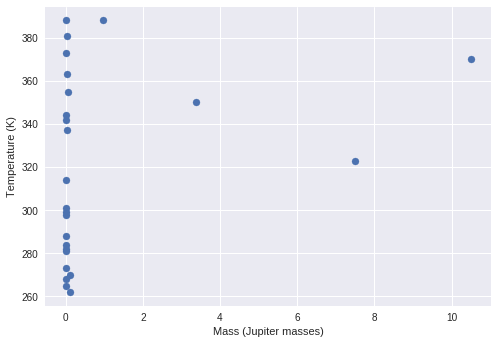

In [161]:
plt.scatter(viable_temp_planets["pl_bmassj"], viable_temp_planets["pl_eqt"])
plt.xlabel("Mass (Jupiter masses)")
plt.ylabel("Temperature (K)")
plt.show()

In [162]:
viable_temp_planets # let's look at everything

149,loc_rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_lumerr1,st_lumerr2,st_lumlim,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim,lum_goldilocks,CHZ_outer,CHZ_inner
667,2768,Kepler-51,d,Transit,3,1.301940e+02,0.005,-0.002,,0.50900,...,,,,-0.079,,,0,0.000000,0.000000,0.000000
1184,2807,Kepler-539,b,Transit,2,1.256324e+02,0.00071,-0.00071,0,0.49880,...,,,,-0.01,0.07,-0.07,0,0.000000,0.000000,0.000000
1363,2694,Kepler-452,b,Transit,1,3.848430e+02,0.007,-0.012,0,1.04600,...,,,,0.21,0.09,-0.09,0,0.000000,0.000000,0.000000
1460,618,HD 42618,b,Radial Velocity,1,1.496100e+02,0.37,-0.34,0,0.55400,...,0.069,-0.083,0,-0.09,0.04,-0.04,0,0.979490,1.359446,0.943634
1686,3008,Kepler-69,c,Transit,2,2.424613e+02,0.0059,-0.0064,0,0.64000,...,0.165,-0.14,0,-0.29,0.15,-0.15,0,0.799834,1.228463,0.852715
1708,3478,PH2,b,Transit,1,2.825255e+02,0.001,-0.001,0,0.82800,...,0.047,-0.046,0,-0.078,0.032,-0.028,0,0.790679,1.221412,0.847820
1936,112,GJ 3021,b,Radial Velocity,1,1.337100e+02,0.2,-0.2,0,0.49000,...,,,0,0.1,0.08,-0.08,0,0.660693,1.116509,0.775003
1983,2108,Kepler-22,b,Transit,1,2.898623e+02,0.0016,-0.002,0,0.84900,...,0.021,-0.023,0,-0.29,0.06,-0.06,0,0.790679,1.221412,0.847820
2205,495,HD 20794,d,Radial Velocity,4,9.030900e+01,0.184,-0.184,0,0.34990,...,,,,-0.4,0.01,-0.01,0,0.000000,0.000000,0.000000
2549,471,HD 192310,b,Radial Velocity,2,7.472000e+01,0.1,-0.1,0,0.32000,...,0.008,-0.008,0,-0.04,0.03,-0.03,0,0.384592,0.851848,0.591294


In [163]:
goldilocks_planets["pl_hostname"]

174       HD 221287
219        HD 13908
277        HD 86264
493       HD 224538
622       HD 142415
659        HD 16175
966       HD 125612
1026      HD 147513
1133       HD 34445
1296      HD 181720
1555        HD 4113
1691      Kepler-47
1830      HD 100777
1983      Kepler-22
1997       HD 43197
2141       HD 45364
2161      HD 165155
2439    HD 137388 A
2500         55 Cnc
2729     BD+14 4559
2793        HD 4732
2797       HD 40307
2955      HD 218566
2961    Kepler-1653
2996        HD 1605
3023     Kepler-443
3200     Kepler-442
3317      HD 147379
3441    Kepler-1652
3471         GJ 832
3476        GJ 3293
3478        GJ 3293
3482         GJ 687
3487         GJ 273
3497       GJ 667 C
3499       GJ 667 C
3524    Proxima Cen
3531     TRAPPIST-1
3685         GJ 876
Name: pl_hostname, dtype: object

In [164]:
# check for commonalities between goldilocks planets and temp viable planets
goldilocks_frame = pd.DataFrame(goldilocks_planets)
filtered_frame = pd.merge(goldilocks_frame, viable_temp_planets, how='inner', left_on='pl_hostname', right_on='pl_hostname').drop_duplicates()[: 4]
filtered_frame

149,loc_rowid_x,pl_hostname,pl_letter_x,pl_discmethod_x,pl_pnum_x,pl_orbper_x,pl_orbpererr1_x,pl_orbpererr2_x,pl_orbperlim_x,pl_orbsmax_x,...,st_lumerr1_y,st_lumerr2_y,st_lumlim_y,st_metfe_y,st_metfeerr1_y,st_metfeerr2_y,st_metfelim_y,lum_goldilocks_y,CHZ_outer_y,CHZ_inner_y
0,2108,Kepler-22,b,Transit,1,289.862300,0.0016,-0.002,0,0.84900,...,0.021,-0.023,0,-0.29,0.06,-0.06,0,0.790679,1.221412,0.847820
1,1950,Kepler-1653,b,Transit,1,140.252400,0.003,-0.003,0,0.47060,...,0.071,-0.066,0,-0.18,0.1,-0.1,0,0.231206,0.660484,0.458462
2,1949,Kepler-1652,b,Transit,1,38.097220,0.00021,-0.00021,0,0.16540,...,0.093,-0.122,0,-0.3,0.12,-0.12,0,0.023014,0.208383,0.144645
3,3508,TRAPPIST-1,e,Transit,7,6.099615,0.000011,-0.000011,0,0.02817,...,0.027,-0.029,0,0.04,0.08,-0.08,0,0.000524,0.031431,0.021817


In [165]:
# let's look for other cool stuff to analyze
# look at this paper: https://arxiv.org/pdf/1711.01267.pdf
nasa_planets.columns.values


array(['loc_rowid', 'pl_hostname', 'pl_letter', 'pl_discmethod',
       'pl_pnum', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2',
       'pl_orbsmaxlim', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_orbincl',
       'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbincllim', 'pl_bmassj',
       'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_radj',
       'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_dens',
       'pl_denserr1', 'pl_denserr2', 'pl_denslim', 'ra_str', 'ra',
       'dec_str', 'dec', 'st_dist', 'st_disterr1', 'st_disterr2',
       'st_distlim', 'st_optmag', 'st_optmagerr', 'st_optmaglim',
       'st_optband', 'gaia_gmag', 'gaia_gmagerr', 'gaia_gmaglim',
       'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_mass',
       'st_masserr1', 'st_masserr2', 'st_masslim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'rowupdate', 'pl_name', 'pl_tra

In [166]:
# finding the gravitational acceleration of a planet
nasa_planets["pl_radj"] = nasa_planets["pl_radj"].convert_objects(convert_numeric = True)
G = 6.67408 * pow(10, -11)
jupiter_mass = 1.898 * pow(10, 27)
jupiter_radius = 69.911 * pow(10, 6)
g_planets = pd.DataFrame(nasa_planets["pl_bmassj"])
g_planets["surface_grav"] = G * nasa_planets.pl_bmassj * jupiter_mass / ((nasa_planets.pl_radj * jupiter_radius) ** 2)
g_planets.dropna(inplace = True)
g_planets[: 5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,pl_bmassj,surface_grav
4,0.0021,9.179826
5,0.0014,7.847057
12,2.8800,20.874016
13,9.0000,103.670831
14,3.3820,28.918293


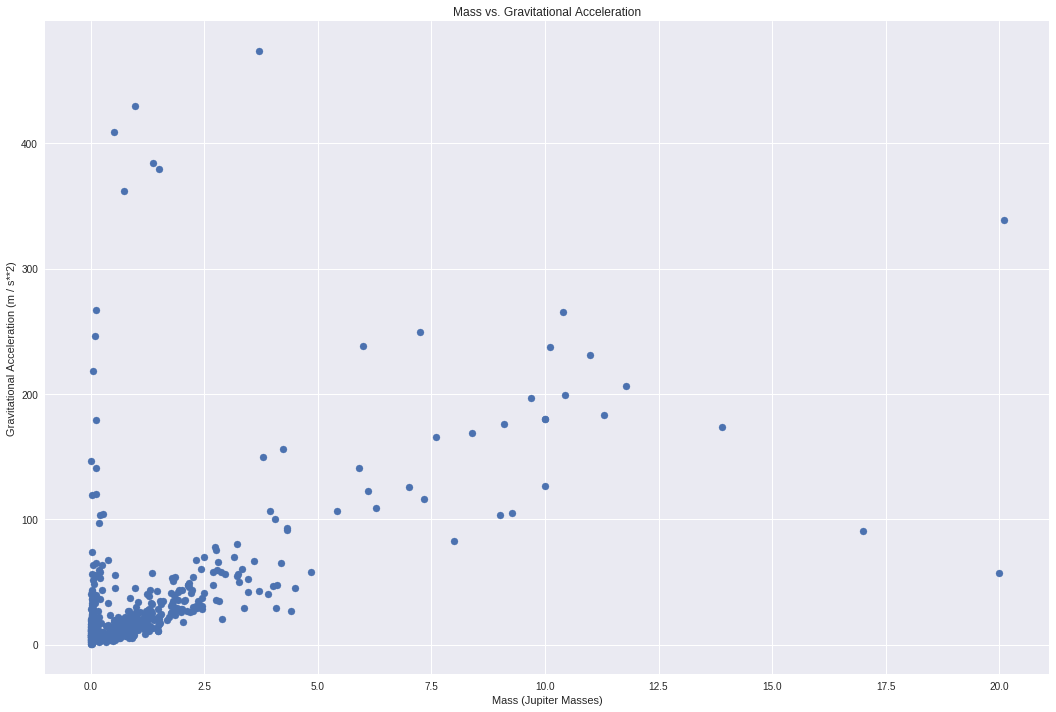

count    566.000000
mean      35.189971
std       58.449555
min        0.452780
25%        9.156716
50%       16.489441
75%       33.487041
max      473.558116
Name: surface_grav, dtype: float64

In [167]:
# mass vs. gravitational acceleration
fig = plt.gcf()
fig.set_size_inches(18, 12)
g_planets = g_planets.loc[g_planets.surface_grav < 500]
plt.scatter(g_planets.pl_bmassj, g_planets.surface_grav)

plt.title("Mass vs. Gravitational Acceleration")
plt.xlabel("Mass (Jupiter Masses)")
plt.ylabel("Gravitational Acceleration (m / s**2)")
plt.show()

g_planets.surface_grav.describe()

In [168]:
g_planets.loc[(g_planets.surface_grav >= 9) & (g_planets.surface_grav <= 11)]

,pl_bmassj,surface_grav
4,0.00210,9.179826
136,1.47000,10.553748
142,0.78000,10.314190
175,0.71100,10.262581
196,0.80500,9.774443
205,0.07740,9.317547
345,0.03430,9.250545
395,0.39800,10.315248
413,0.01573,10.504923
567,0.62700,9.118042


In [169]:
nasa_planets.iloc[g_planets.loc[(g_planets.surface_grav >= 9) & (g_planets.surface_grav <= 11)].index - 1]

149,loc_rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_lumerr1,st_lumerr2,st_lumlim,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim,lum_goldilocks,CHZ_outer,CHZ_inner
4,1085,KOI-55,c,Orbital Brightness Modulation,2,0.342887,0.000013,-0.000013,0,0.00760,...,0.055,-0.063,0,-0.106,,,0,22.908677,6.574490,4.563559
136,3544,WASP-12,b,Transit,1,1.091420,0.00000014,-0.00000014,0,0.02340,...,0.054,-0.061,0,0.33,0.14,-0.17,0,4.045759,2.762880,1.917802
142,223,HAT-P-9,b,Transit,1,3.922890,0.00004,-0.00004,0,0.05300,...,0.09,,0,,,,,2.570396,2.202227,1.528635
175,188,HAT-P-30,b,Transit,1,2.810595,0.000005,-0.000005,0,0.04190,...,0.048,-0.054,0,0.13,0.08,-0.08,0,2.051162,1.967261,1.365538
196,3654,WASP-92,b,Transit,1,2.174674,0.0000016,-0.0000016,0,0.03480,...,,,,0,0.14,-0.14,0,0.000000,0.000000,0.000000
205,2199,Kepler-25,c,Transit,3,12.720400,,,0,NaN,...,,,,-0.04,0.1,-0.1,0,0.000000,0.000000,0.000000
345,3127,Kepler-79,b,Transit,4,13.484500,0.0002,-0.0002,0,0.11700,...,0.034,-0.041,0,-0.073,0.062,-0.009,0,2.197860,2.036395,1.413526
395,942,K2-232,b,Transit,1,11.168454,0.000023,-0.000023,0,0.10356,...,0.024,-0.029,0,0.1,0.04,-0.04,0,1.729816,1.806600,1.254018
413,1952,Kepler-1655,b,Transit,1,11.872879,0.0000085,-0.0000085,0,0.10300,...,,,0,-0.24,0.05,-0.05,0,0.000000,0.000000,0.000000
567,3615,WASP-55,b,Transit,1,4.465629,0.0000011,-0.0000011,0,0.05580,...,,,,0.09,0.05,-0.05,0,0.000000,0.000000,0.000000


1    0.19
2    0.08
3       0
4        
5        
Name: pl_orbeccen, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


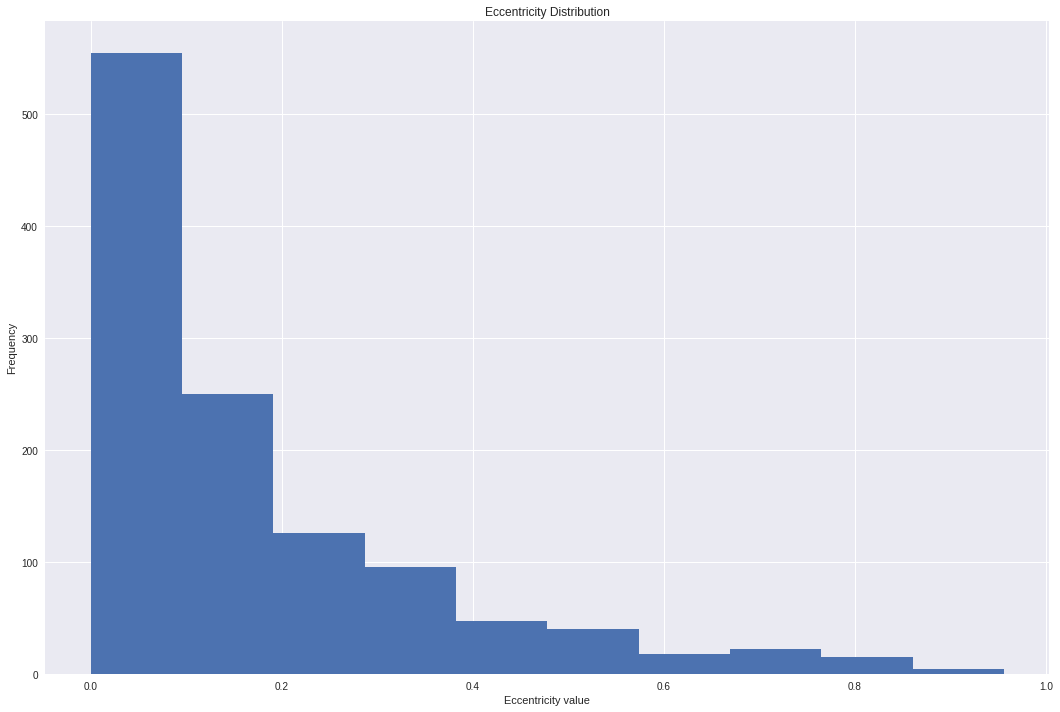

count    1172.000000
mean        0.166001
std         0.189718
min         0.000000
25%         0.020000
50%         0.105500
75%         0.241250
max         0.956000
Name: pl_orbeccen, dtype: float64

In [170]:
# plot orbit eccentricities
from scipy import stats

fig = plt.gcf()
fig.set_size_inches(18, 12)

eccen_data = nasa_planets["pl_orbeccen"]
eccen_data = eccen_data.dropna()
print(eccen_data.head())
eccen_data = eccen_data.convert_objects(convert_numeric = True)
eccen_data = eccen_data.dropna()
plt.hist(eccen_data)

# m, s = stats.norm.fit(eccen_data)
# pdf_norm = stats.norm.pdf(np.linspace(0, 1, len(eccen_data)), m, s)  
# plt.plot(np.linspace(0, 1, len(eccen_data)), pdf_norm, label="Gamma")

plt.title("Eccentricity Distribution")
plt.xlabel("Eccentricity value")
plt.ylabel("Frequency")
plt.show()

eccen_data.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


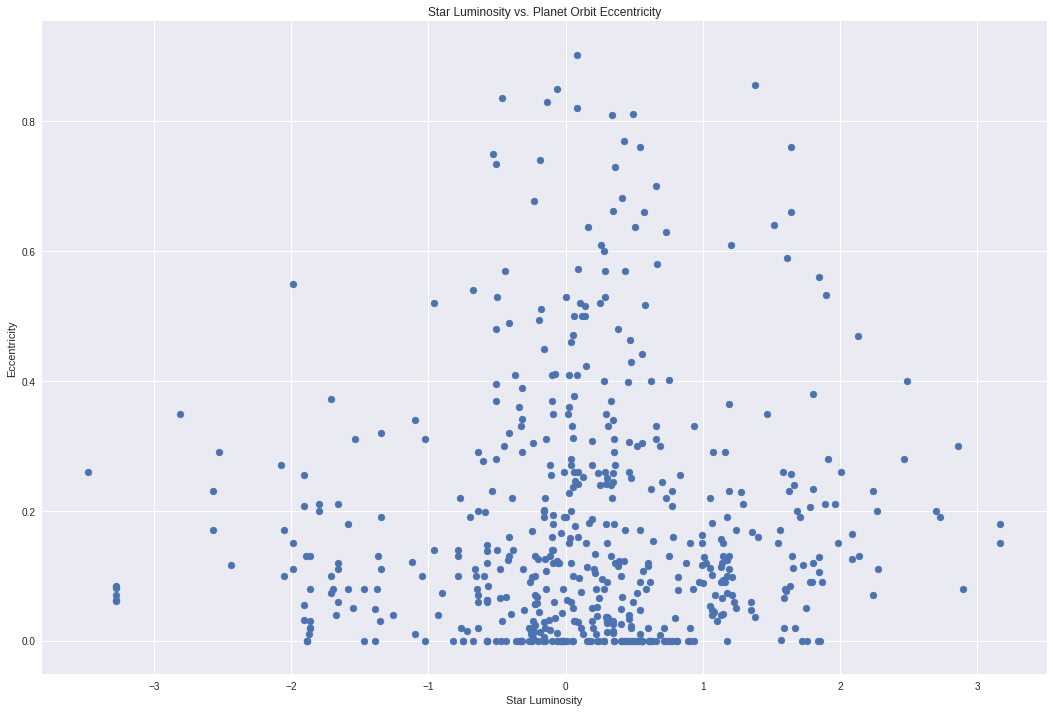

In [171]:
# luminosity vs. eccentricity
fig = plt.gcf()
fig.set_size_inches(18, 12)
nasa_planets["pl_orbeccen"] = nasa_planets["pl_orbeccen"].convert_objects(convert_numeric = True)
lum_eccen_data = nasa_planets.loc[nasa_planets["st_lum"] != -1000000]
plt.scatter(lum_eccen_data["st_lum"], lum_eccen_data["pl_orbeccen"]) # in log values

plt.title("Star Luminosity vs. Planet Orbit Eccentricity")
plt.xlabel("Star Luminosity")
plt.ylabel("Eccentricity")
plt.show()

# high eccentricity and high luminosity means that if there is surface water, it tends to freeze and melt periodically as the planet revolves around the star
# reference: https://www.aanda.org/articles/aa/pdf/2016/07/aa28073-16.pdf

In [172]:
"""Linsenmeier et al. (2015) studied the influence of both obliquity and eccentricity for ocean covered planets orbiting a Sun-like star on 
a 365 day orbit and a 24 hour day, like Earth. They found that planets with eccentricities higher than 0.2 can only sustain surface liquid 
water for a part of the year."""
# which planets have an eccentricity less than 0.2?

nice_eccen = nasa_planets.loc[nasa_planets.pl_orbeccen < 0.2]
print("Number of planets with orbit eccentricity < 0.2: " + str(len(nice_eccen)))

Number of planets with orbit eccentricity < 0.2: 808


In [173]:
with_eccen_filter = pd.merge(filtered_frame, nice_eccen, on='pl_hostname').drop_duplicates()[: 2]
with_eccen_filter

149,loc_rowid_x,pl_hostname,pl_letter_x,pl_discmethod_x,pl_pnum_x,pl_orbper_x,pl_orbpererr1_x,pl_orbpererr2_x,pl_orbperlim_x,pl_orbsmax_x,...,st_lumerr1,st_lumerr2,st_lumlim,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim,lum_goldilocks,CHZ_outer,CHZ_inner
0,2108,Kepler-22,b,Transit,1,289.862300,0.0016,-0.002,0,0.84900,...,0.021,-0.023,0,-0.29,0.06,-0.06,0,0.790679,1.221412,0.847820
1,3508,TRAPPIST-1,e,Transit,7,6.099615,0.000011,-0.000011,0,0.02817,...,0.027,-0.029,0,0.04,0.08,-0.08,0,0.000524,0.031431,0.021817


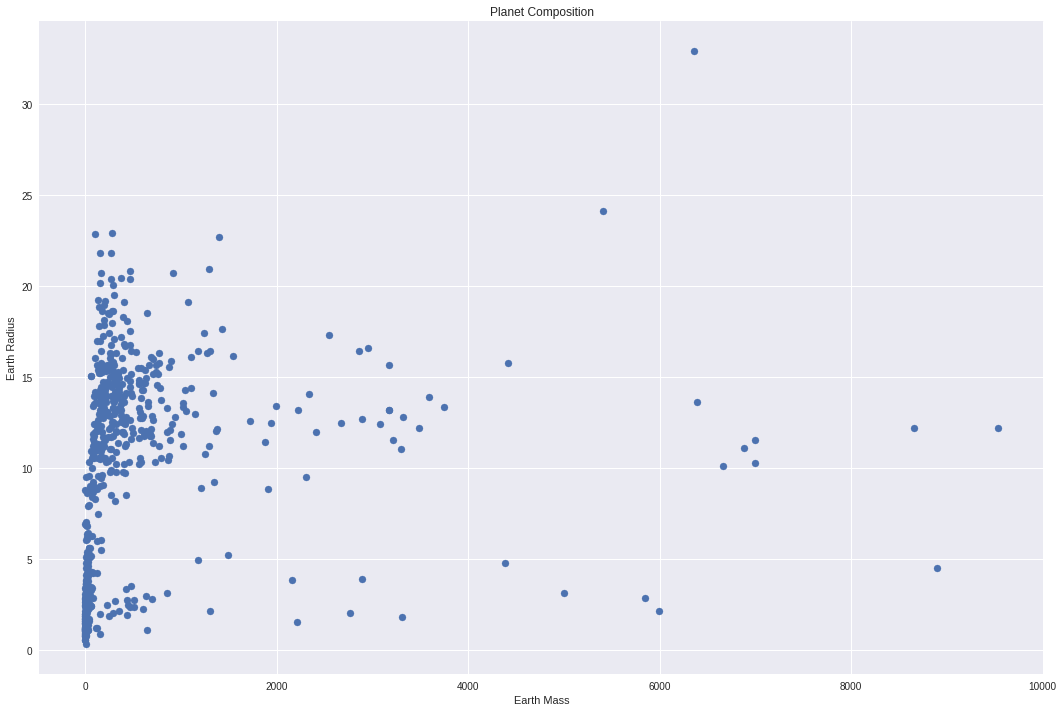

In [174]:
# plot the composition graphs on top of mass vs. radius
fig = plt.gcf()
fig.set_size_inches(18, 12)
earth_mass = 5.972 * pow(10, 24)
earth_radius = 6371 * pow(10, 3)
plt.scatter(nasa_planets.pl_bmassj * jupiter_mass / earth_mass, nasa_planets.pl_radj * jupiter_radius / earth_radius)

plt.title("Planet Composition")
plt.xlabel("Earth Mass")
plt.ylabel("Earth Radius")

# need to plot mass-radius relationships for various compositions e.g. 100% Fe, Hydrogen, MgSO3 etc. -- we need something called core mass fraction / EOS for that
# http://seagerexoplanets.mit.edu/ftp/Papers/Seager2007.pdf
# log(10) R_s = k_1 + 1/3log(10) M_s - k_2 M_s ^k_3
plt.show()

In [0]:
composition_data = pd.read_table("https://www.cfa.harvard.edu/~lzeng/tables/mrtable3.txt")

In [176]:
composition_data.head()

,,100%fe,95%fe,90%fe,85%fe,80%fe,75%fe,70%fe,65%fe,60%fe,...,65%h2o,70%h2o,75%h2o,80%h2o,85%h2o,90%h2o,95%h2o,100%h2o,cold_h2/he,max_coll_strip
0,Mearth,Rearth,Rearth,Rearth,Rearth,Rearth,Rearth,Rearth,Rearth,Rearth,...,Rearth,Rearth,Rearth,Rearth,Rearth,Rearth,Rearth,Rearth,Rearth,Rearth
1,0.0625,0.3571,0.3654,0.3722,0.3788,0.3852,0.3915,0.3977,0.4036,0.4093,...,0.5872,0.5939,0.6005,0.6068,0.613,0.6196,0.6257,0.6322,1.1972,
2,0.06699,0.3651,0.3735,0.3804,0.3872,0.3938,0.4003,0.4065,0.4126,0.4183,...,0.5996,0.6064,0.6131,0.6196,0.6259,0.6324,0.6387,0.6454,1.224,
3,0.07179,0.3733,0.3819,0.389,0.3959,0.4027,0.4093,0.4156,0.4218,0.4276,...,0.6121,0.6191,0.626,0.6327,0.6392,0.6454,0.6522,0.6588,1.252,
4,0.07695,0.3818,0.3905,0.3978,0.4049,0.4118,0.4186,0.425,0.4312,0.4372,...,0.6251,0.6321,0.639,0.6459,0.6526,0.6589,0.6656,0.6724,1.281,


In [0]:
composition_data.drop(composition_data.index[0], inplace = True)

In [178]:
composition_data.head()

,,100%fe,95%fe,90%fe,85%fe,80%fe,75%fe,70%fe,65%fe,60%fe,...,65%h2o,70%h2o,75%h2o,80%h2o,85%h2o,90%h2o,95%h2o,100%h2o,cold_h2/he,max_coll_strip
1,0.0625,0.3571,0.3654,0.3722,0.3788,0.3852,0.3915,0.3977,0.4036,0.4093,...,0.5872,0.5939,0.6005,0.6068,0.613,0.6196,0.6257,0.6322,1.1972,
2,0.06699,0.3651,0.3735,0.3804,0.3872,0.3938,0.4003,0.4065,0.4126,0.4183,...,0.5996,0.6064,0.6131,0.6196,0.6259,0.6324,0.6387,0.6454,1.224,
3,0.07179,0.3733,0.3819,0.389,0.3959,0.4027,0.4093,0.4156,0.4218,0.4276,...,0.6121,0.6191,0.626,0.6327,0.6392,0.6454,0.6522,0.6588,1.252,
4,0.07695,0.3818,0.3905,0.3978,0.4049,0.4118,0.4186,0.425,0.4312,0.4372,...,0.6251,0.6321,0.639,0.6459,0.6526,0.6589,0.6656,0.6724,1.281,
5,0.08247,0.3903,0.3992,0.4066,0.4139,0.4211,0.4281,0.4346,0.441,0.4472,...,0.6382,0.6454,0.6524,0.6594,0.6662,0.6729,0.6793,0.6863,1.31,


In [0]:
composition_data.rename(columns = {list(composition_data)[0] : "Mass (Earth Masses)"}, inplace = True)

In [180]:
composition_data.head()

,Mass (Earth Masses),100%fe,95%fe,90%fe,85%fe,80%fe,75%fe,70%fe,65%fe,60%fe,...,65%h2o,70%h2o,75%h2o,80%h2o,85%h2o,90%h2o,95%h2o,100%h2o,cold_h2/he,max_coll_strip
1,0.0625,0.3571,0.3654,0.3722,0.3788,0.3852,0.3915,0.3977,0.4036,0.4093,...,0.5872,0.5939,0.6005,0.6068,0.613,0.6196,0.6257,0.6322,1.1972,
2,0.06699,0.3651,0.3735,0.3804,0.3872,0.3938,0.4003,0.4065,0.4126,0.4183,...,0.5996,0.6064,0.6131,0.6196,0.6259,0.6324,0.6387,0.6454,1.224,
3,0.07179,0.3733,0.3819,0.389,0.3959,0.4027,0.4093,0.4156,0.4218,0.4276,...,0.6121,0.6191,0.626,0.6327,0.6392,0.6454,0.6522,0.6588,1.252,
4,0.07695,0.3818,0.3905,0.3978,0.4049,0.4118,0.4186,0.425,0.4312,0.4372,...,0.6251,0.6321,0.639,0.6459,0.6526,0.6589,0.6656,0.6724,1.281,
5,0.08247,0.3903,0.3992,0.4066,0.4139,0.4211,0.4281,0.4346,0.441,0.4472,...,0.6382,0.6454,0.6524,0.6594,0.6662,0.6729,0.6793,0.6863,1.31,


In [181]:
composition_data.drop("max_coll_strip", inplace = True, axis = 1)
composition_data.head()

,Mass (Earth Masses),100%fe,95%fe,90%fe,85%fe,80%fe,75%fe,70%fe,65%fe,60%fe,...,60%h2o,65%h2o,70%h2o,75%h2o,80%h2o,85%h2o,90%h2o,95%h2o,100%h2o,cold_h2/he
1,0.0625,0.3571,0.3654,0.3722,0.3788,0.3852,0.3915,0.3977,0.4036,0.4093,...,0.5803,0.5872,0.5939,0.6005,0.6068,0.613,0.6196,0.6257,0.6322,1.1972
2,0.06699,0.3651,0.3735,0.3804,0.3872,0.3938,0.4003,0.4065,0.4126,0.4183,...,0.5925,0.5996,0.6064,0.6131,0.6196,0.6259,0.6324,0.6387,0.6454,1.224
3,0.07179,0.3733,0.3819,0.389,0.3959,0.4027,0.4093,0.4156,0.4218,0.4276,...,0.6051,0.6121,0.6191,0.626,0.6327,0.6392,0.6454,0.6522,0.6588,1.252
4,0.07695,0.3818,0.3905,0.3978,0.4049,0.4118,0.4186,0.425,0.4312,0.4372,...,0.6179,0.6251,0.6321,0.639,0.6459,0.6526,0.6589,0.6656,0.6724,1.281
5,0.08247,0.3903,0.3992,0.4066,0.4139,0.4211,0.4281,0.4346,0.441,0.4472,...,0.6308,0.6382,0.6454,0.6524,0.6594,0.6662,0.6729,0.6793,0.6863,1.31


In [182]:
composition_data["Mass (Earth Masses)"].dtype

dtype('O')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


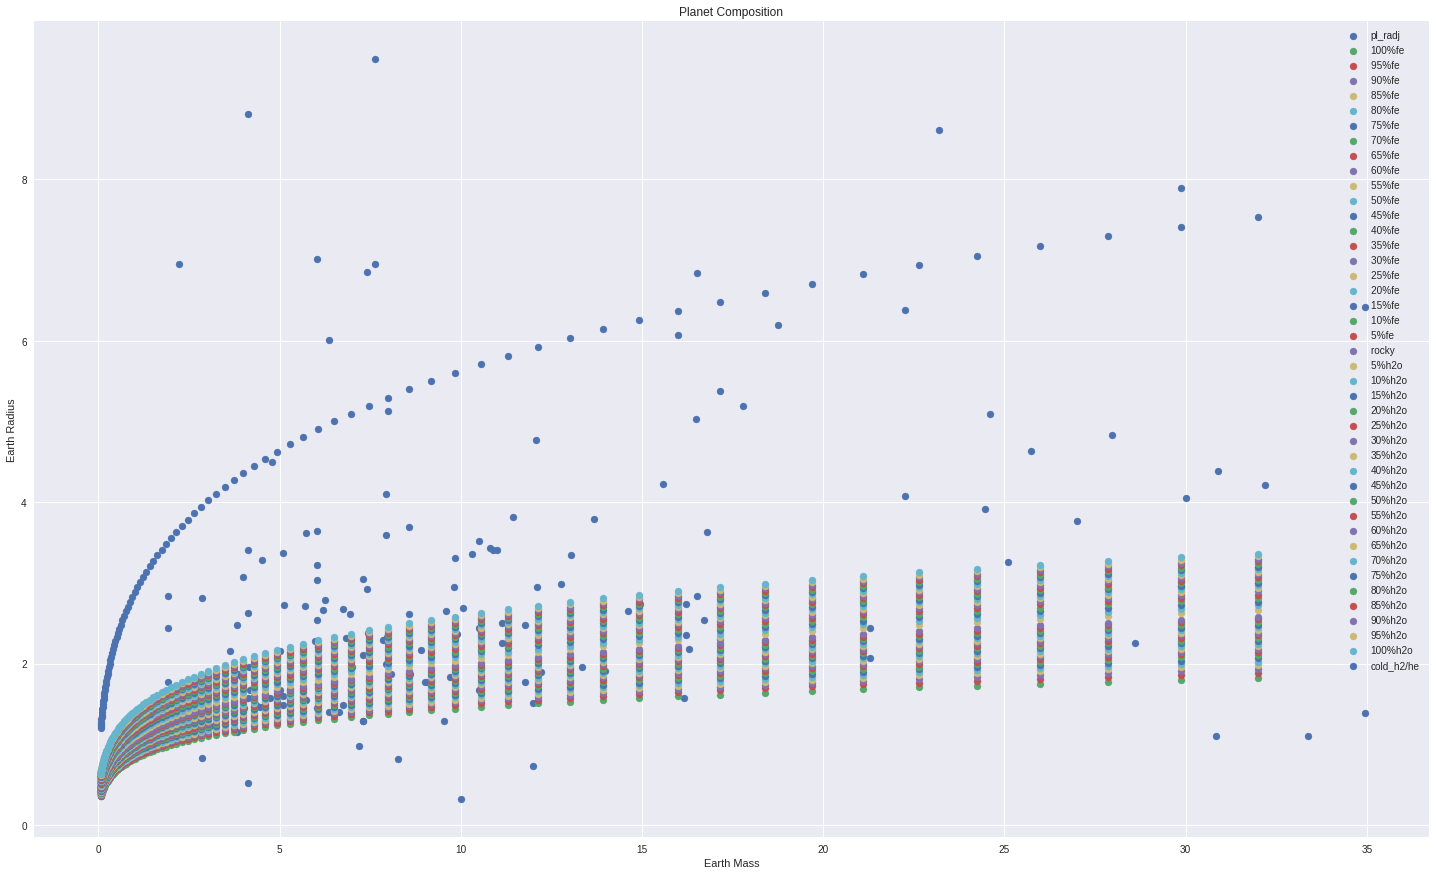

In [183]:
base_data = nasa_planets.loc[nasa_planets.pl_bmassj * jupiter_mass / earth_mass < 35]
base_mass_data = base_data.pl_bmassj * jupiter_mass / earth_mass
base_rad_data = base_data.pl_radj * jupiter_radius / earth_radius

fig = plt.gcf()
fig.set_size_inches(25, 15)

composition_data = composition_data.convert_objects(convert_numeric=True)

plt.scatter(base_mass_data, base_rad_data)
all_graph_data = []

for c in composition_data.columns[1:]:
  new_x = composition_data["Mass (Earth Masses)"]
  new_y = composition_data[c]
  all_graph_data.append([new_x, new_y])
  plt.scatter(new_x, new_y)

plt.title("Planet Composition")
plt.xlabel("Earth Mass")
plt.ylabel("Earth Radius")

plt.legend()

plt.show()

In [0]:
from sklearn import linear_model as lm
import scipy

In [185]:
all_graph_data[1]

[1      0.06250
 2      0.06699
 3      0.07179
 4      0.07695
 5      0.08247
 6      0.08839
 7      0.09473
 8      0.10150
 9      0.10880
 10     0.11660
 11     0.12500
 12     0.13400
 13     0.14360
 14     0.15390
 15     0.16490
 16     0.17680
 17     0.18950
 18     0.20310
 19     0.21760
 20     0.23330
 21     0.25000
 22     0.26790
 23     0.28720
 24     0.30780
 25     0.32990
 26     0.35360
 27     0.37890
 28     0.40610
 29     0.43530
 30     0.46650
         ...   
 62     4.28700
 63     4.59500
 64     4.92500
 65     5.27800
 66     5.65700
 67     6.06300
 68     6.49800
 69     6.96400
 70     7.46400
 71     8.00000
 72     8.57400
 73     9.19000
 74     9.84900
 75    10.56000
 76    11.31000
 77    12.13000
 78    13.00000
 79    13.93000
 80    14.93000
 81    16.00000
 82    17.15000
 83    18.38000
 84    19.70000
 85    21.11000
 86    22.63000
 87    24.25000
 88    25.99000
 89    27.86000
 90    29.86000
 91    32.00000
 Name: Mass (Earth Masse

In [0]:
def func(x, a, b, c):
  return a * np.exp(-b * x) + c

all_reg_coeffs = []
new_fits = []
for x in all_graph_data:
  coeffs = scipy.optimize.curve_fit(func, x[0], x[1])
  all_reg_coeffs.append(coeffs[0])

In [187]:
# let's do a sanity check of the coefficients
all_reg_coeffs[:5]

[array([-1.16112315,  0.24386771,  1.64184472]),
 array([-1.20829404,  0.2376977 ,  1.70197425]),
 array([-1.24356152,  0.23228341,  1.74895776]),
 array([-1.27521753,  0.22835642,  1.79093244]),
 array([-1.30533512,  0.2249323 ,  1.83058172])]

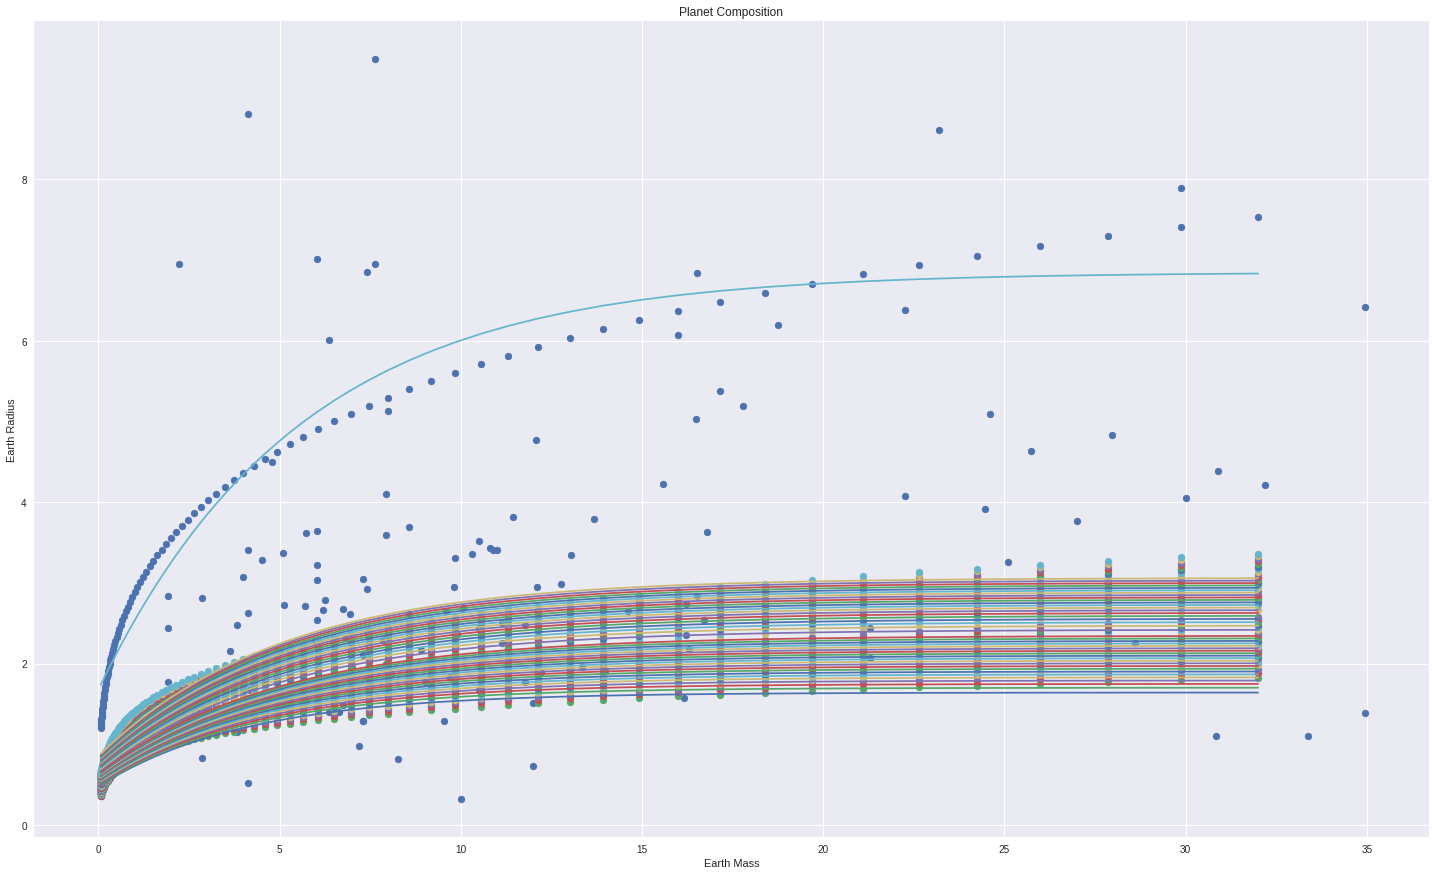

In [188]:
# how good is the fit?

fig = plt.gcf()
fig.set_size_inches(25, 15)

plt.scatter(base_mass_data, base_rad_data)
new_x = composition_data["Mass (Earth Masses)"]

for c in composition_data.columns[1:]:
  new_y = composition_data[c]
  plt.scatter(new_x, new_y)
  
for x in all_reg_coeffs:
  plt.plot(new_x, x[0] * np.exp(-x[1] * new_x) + x[2])

plt.title("Planet Composition")
plt.xlabel("Earth Mass")
plt.ylabel("Earth Radius")

plt.show()

In [189]:
import math

cleaned_base_mass_data = []
cleaned_base_rad_data = []
for i in base_mass_data:
  cleaned_base_mass_data.append(i)
for i in base_rad_data:
  cleaned_base_rad_data.append(i)
raw_data = [[cleaned_base_mass_data[i], cleaned_base_rad_data[i]] for i in range(len(base_mass_data))]
classified = []

def dist(x1, y1, x2, y2):
  return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

for data_point in raw_data:
  min_dist = 100000
  count = 1
  for x in all_reg_coeffs:
    curr_dist = dist(data_point[0], func(data_point[0], x[0], x[1], x[2]), data_point[0], data_point[1])
    if curr_dist < min_dist:
      min_dist = curr_dist
      min_index = composition_data.columns[count]
    count+=1
  classified += [min_index]
  
print("Number of classified planets: " + str(len(classified)))

Number of classified planets: 313


In [190]:
pd.Series(classified).describe()

count         313
unique         38
top       100%h2o
freq           93
dtype: object

In [191]:
classified_counts = {}
for i in composition_data.columns[1:]:
  classified_counts[i] = 0
for i in classified:
  classified_counts[i] += 1
classified_counts

{'10%fe ': 5,
 '10%h2o': 6,
 '100%fe': 32,
 '100%h2o': 93,
 '15%fe ': 8,
 '15%h2o': 2,
 '20%fe ': 0,
 '20%h2o': 1,
 '25%fe ': 1,
 '25%h2o': 7,
 '30%fe ': 4,
 '30%h2o': 2,
 '35%fe ': 3,
 '35%h2o': 2,
 '40%fe ': 2,
 '40%h2o': 3,
 '45%fe ': 1,
 '45%h2o': 39,
 '5%fe  ': 1,
 '5%h2o ': 7,
 '50%fe ': 1,
 '50%h2o': 3,
 '55%fe ': 8,
 '55%h2o': 1,
 '60%fe ': 5,
 '60%h2o': 1,
 '65%fe ': 2,
 '65%h2o': 5,
 '70%fe ': 4,
 '70%h2o': 0,
 '75%fe ': 3,
 '75%h2o': 5,
 '80%fe ': 0,
 '80%h2o': 2,
 '85%fe ': 1,
 '85%h2o': 3,
 '90%fe ': 2,
 '90%h2o': 1,
 '95%fe ': 10,
 '95%h2o': 0,
 'cold_h2/he': 35,
 'rocky ': 2}

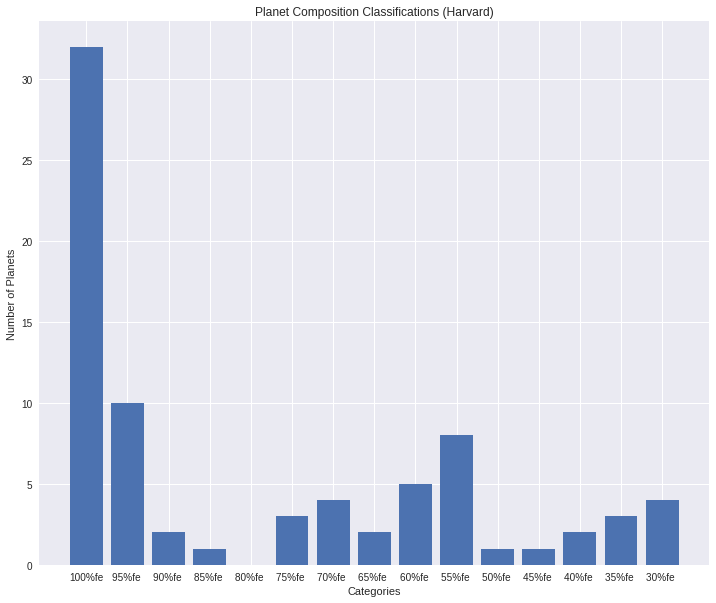

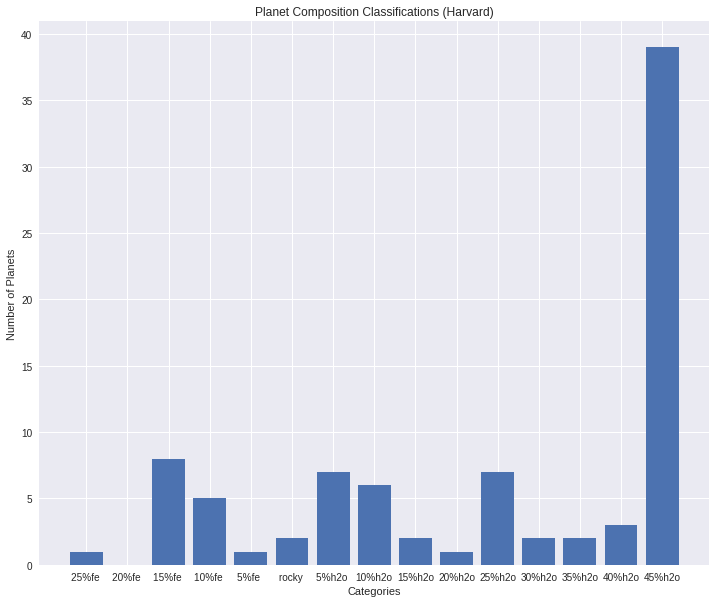

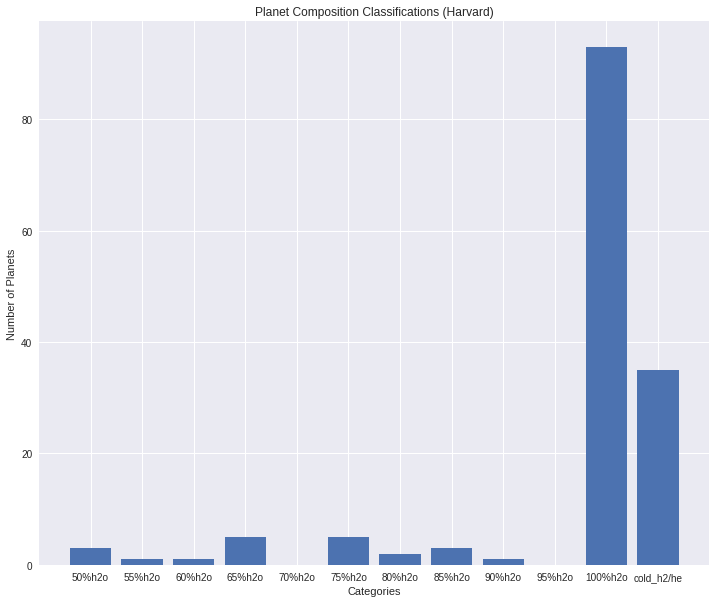

In [192]:
fig = plt.gcf()
fig.set_size_inches(12, 10)

plt.bar(range(15), list(classified_counts.values())[:15], align='center')
plt.xticks(range(15), list(classified_counts.keys())[:15])
plt.title("Planet Composition Classifications (Harvard)")
plt.xlabel("Categories")
plt.ylabel("Number of Planets")
plt.show()

fig = plt.gcf()
fig.set_size_inches(12, 10)
plt.bar(range(15), list(classified_counts.values())[15:30], align='center')
plt.xticks(range(15), list(classified_counts.keys())[15:30])
plt.title("Planet Composition Classifications (Harvard)")
plt.xlabel("Categories")
plt.ylabel("Number of Planets")
plt.show()

fig = plt.gcf()
fig.set_size_inches(12, 10)
plt.bar(range(12), list(classified_counts.values())[30:43], align='center')
plt.xticks(range(12), list(classified_counts.keys())[30:43])
plt.title("Planet Composition Classifications (Harvard)")
plt.xlabel("Categories")
plt.ylabel("Number of Planets")
plt.show()

<table>
  <tr><th>Category</th><th>Num. Planets</th></tr>
  <tr><td>10%fe</td><td>5</td></tr>
  <tr><td>10%h2o</td><td> 6</td></tr>
 <tr><td>100%fe</td><td> 32</td></tr>
 <tr><td>100%h2o</td><td> 93</td></tr>
 <tr><td>15%fe</td><td> 8</td></tr>
 <tr><td>15%h2o</td><td>2</td></tr>
 <tr><td>20%fe</td><td>0</td></tr>
 <tr><td>20%h2o</td><td>1</td></tr>
 <tr><td>25%fe</td><td>1</td></tr>
 <tr><td>25%h2o</td><td>7</td></tr>
 <tr><td>30%fe</td><td>4</td></tr>
 <tr><td>30%h2o</td><td>2</td></tr>
 <tr><td>35%fe</td><td>3</td></tr>
 <tr><td>35%h2o</td><td>2</td></tr>
 <tr><td>40%fe</td><td>2</td></tr>
 <tr><td>40%h2o</td><td>3</td></tr>
 <tr><td>45%fe</td><td>1</td></tr>
 <tr><td>45%h2o</td><td>39</td></tr>
 <tr><td>5%fe</td><td>1</td></tr>
 <tr><td>5%h2o</td><td>7</td></tr>
 <tr><td>50%fe</td><td>1</td></tr>
 <tr><td>50%h2o</td><td>3</td></tr>
 <tr><td>55%fe</td><td>8</td></tr>
 <tr><td>55%h2o</td><td>1</td></tr>
 <tr><td>60%fe</td><td>5</td></tr>
 <tr><td>60%h2o</td><td>1</td></tr>
 <tr><td>65%fe</td><td>2</td></tr>
 <tr><td>65%h2o</td><td>5</td></tr>
 <tr><td>70%fe</td><td>4</td></tr>
 <tr><td>70%h2o</td><td>0</td></tr>
 <tr><td>75%fe</td><td>3</td></tr>
 <tr><td>75%h2o</td><td>5</td></tr>
 <tr><td>80%fe</td><td>0</td></tr>
 <tr><td>80%h2o</td><td>2</td></tr>
 <tr><td>85%fe</td><td>1</td></tr>
 <tr><td>85%h2o</td><td>3</td></tr>
 <tr><td>90%fe</td><td>2</td></tr>
 <tr><td>90%h2o</td><td>1</td></tr>
 <tr><td>95%fe</td><td>10</td></tr>
 <tr><td>95%h2o</td><td>0</td></tr>
 <tr><td>cold_h2/he</td><td>35</td></tr>
 <tr><td>rocky</td><td>2</td></tr>
</table>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


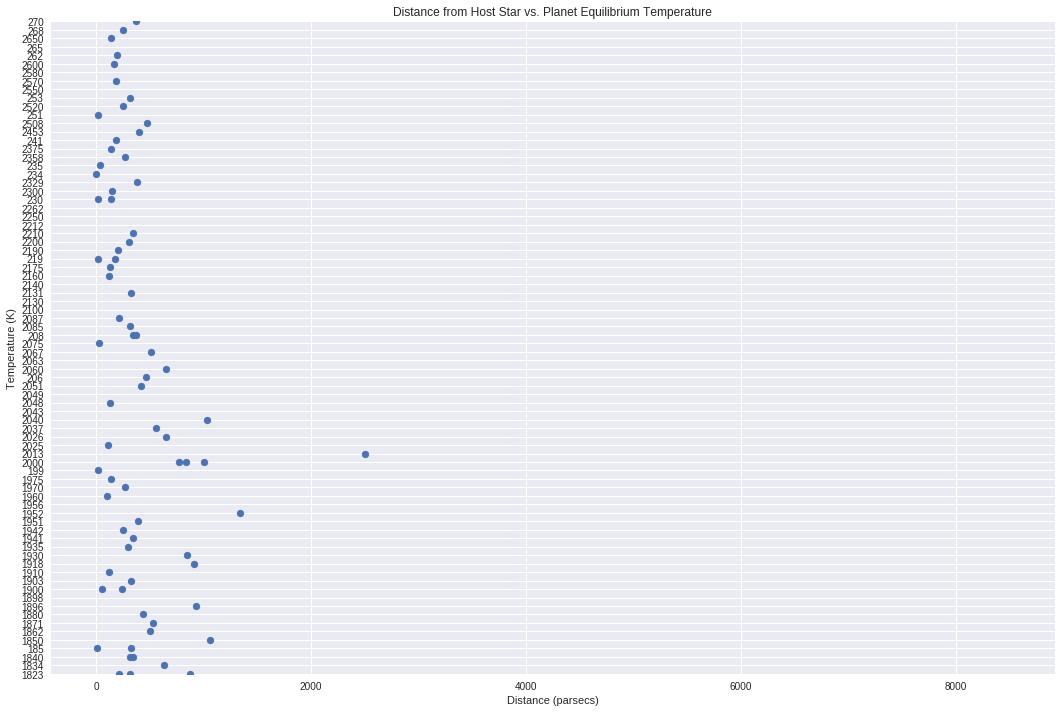

In [193]:
fig = plt.gcf()
fig.set_size_inches(18, 12)

nasa_planets['st_dist'] = nasa_planets["st_dist"].convert_objects(convert_numeric = True)
plt.scatter(nasa_planets["st_dist"], nasa_planets["pl_eqt"])
plt.title("Distance from Host Star vs. Planet Equilibrium Temperature")
plt.xlabel("Distance (parsecs)")
plt.ylabel("Temperature (K)")

plt.ylim([175, 270])
plt.show()

In [0]:
# working on the seager model
# k1, k2, and k3 values
fe_const = [0.209490, 0.0804, 0.394]
perovs_const = [ 0.209594, 0.0799, 0.413]
water_const =  [0.209396, 0.0807, 0.375]

In [195]:
nasa_planets['pl_bmassj'] = nasa_planets["pl_bmassj"].convert_objects(convert_numeric = True)

m_s = nasa_planets["pl_bmassj"] * jupiter_mass / earth_mass
r_s = nasa_planets["pl_radj"] * jupiter_radius / earth_radius

seager_df = pd.concat([m_s, r_s], axis=1).reset_index()
seager_df = seager_df
seager_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,index,pl_bmassj,pl_radj
0,1,730.977897,NaN
1,2,2329.594776,NaN
2,3,1017.012726,NaN
3,4,0.667415,0.844945
4,5,0.444943,0.746186
5,6,NaN,NaN
6,7,NaN,NaN
7,8,NaN,NaN
8,9,4327.389149,NaN
9,10,7309.778969,NaN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


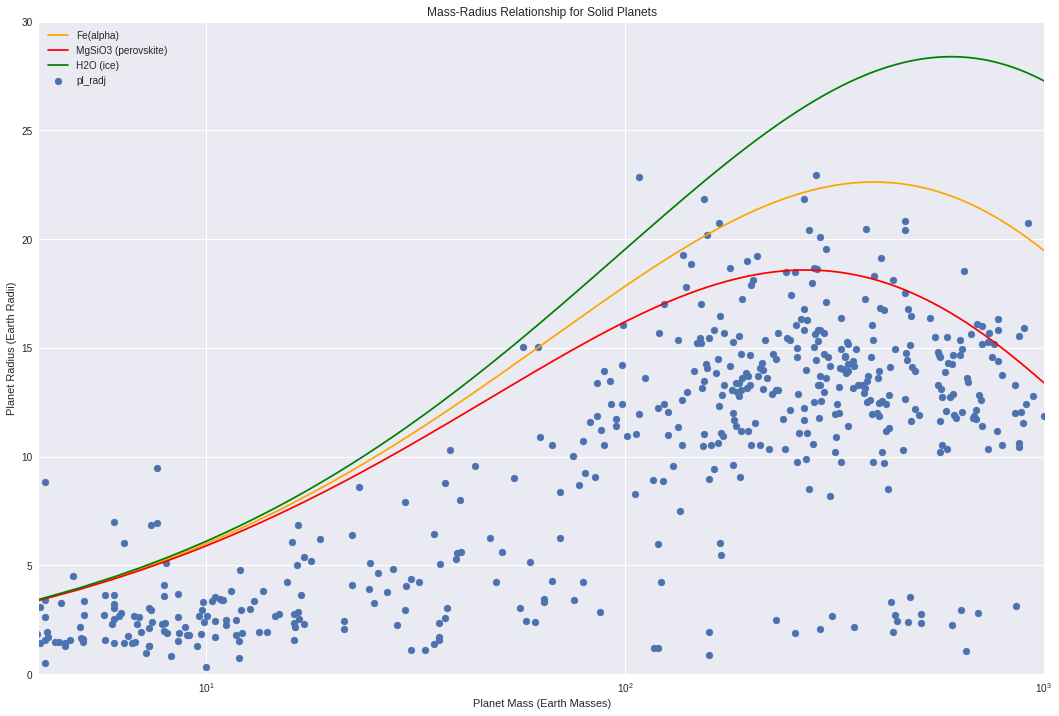

In [196]:
fig = plt.gcf()
fig.set_size_inches(18, 12)

x = seager_df["pl_bmassj"]
y = seager_df["pl_radj"]
new_x = np.arange(0, 1000)

plt.xscale('log')

plt.xlim(4, 1000)
plt.ylim(0, 30)

plt.scatter(x, y)
plt.plot(new_x, 10 ** (fe_const[0] + 1 / 3 * np.log(new_x) - fe_const[1] * (new_x**fe_const[2])), color = "orange", label = "Fe(alpha)")
plt.plot(new_x, 10 ** (perovs_const[0] + 1 / 3 * np.log(new_x) - perovs_const[1] * (new_x**perovs_const[2])), color = "red", label = "MgSiO3 (perovskite)")
plt.plot(new_x, 10 ** (water_const[0] + 1 / 3 * np.log(new_x) - water_const[1] * (new_x**water_const[2])), color = "green", label = "H2O (ice)")

plt.title("Mass-Radius Relationship for Solid Planets")
plt.xlabel("Planet Mass (Earth Masses)")
plt.ylabel("Planet Radius (Earth Radii)")

plt.legend()

plt.show()

In [197]:
len(y.loc[y - 10 ** (fe_const[0] + 1 / 3 * np.log(x) - fe_const[1] * (x**fe_const[2])) <= 0.1].index)

552

In [203]:
len(y.loc[y - 10 ** (water_const[0] + 1 / 3 * np.log(x) - water_const[1] * (x**water_const[2])) <= 0.1])

579

In [198]:
nasa_planets.iloc[y.loc[y - 10 ** (perovs_const[0] + 1 / 3 * np.log(x) - perovs_const[1] * (x**perovs_const[2])) <= 0.1].index]

149,loc_rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_lumerr1,st_lumerr2,st_lumlim,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim,lum_goldilocks,CHZ_outer,CHZ_inner
4,1085,KOI-55,c,Orbital Brightness Modulation,2,0.342887,0.000013,-0.000013,0,0.00760,...,0.055,-0.063,0,-0.106,,,0,22.908677,6.574490,4.563559
5,1084,KOI-55,b,Orbital Brightness Modulation,2,0.240104,0.000004,-0.000004,0,0.00600,...,0.055,-0.063,0,-0.106,,,0,22.908677,6.574490,4.563559
20,216,HAT-P-57,b,Transit,1,2.465295,0.0000032,-0.0000032,0,0.04060,...,0.069,-0.082,0,-0.25,0.25,-0.25,0,6.397348,3.474258,2.411591
21,1046,KELT-17,b,Transit,1,3.080172,0.0000053,-0.0000052,0,0.04881,...,0.034,-0.033,0,-0.018,0.074,-0.072,0,7.516229,3.765842,2.613988
35,207,HAT-P-49,b,Transit,1,2.691548,0.000006,-0.000006,0,0.04380,...,0.066,-0.04,0,0.074,0.08,-0.08,0,6.516284,3.506405,2.433905
38,1056,KELT-7,b,Transit,1,2.734775,0.0000039,-0.0000039,0,0.04415,...,0.027,-0.028,0,0.139,0.075,-0.081,0,5.727960,3.287472,2.281937
50,3655,WASP-93,b,Transit,1,2.732532,0.000002,-0.000002,0,0.04211,...,,,,0.07,0.17,-0.17,0,0.000000,0.000000,0.000000
54,1047,KELT-18,b,Transit,1,2.871752,0.0000028,-0.0000028,0,0.04550,...,0.041,-0.041,0,0.09,0.13,-0.13,0,6.501297,3.502370,2.431105
62,169,HAT-P-14,b,Transit,1,4.627669,0.000005,-0.000005,0,0.06060,...,0.042,-0.046,0,0.11,0.08,-0.08,0,3.655948,2.626407,1.823071
63,3627,WASP-66,b,Transit,1,4.086052,0.000007,-0.000007,0,0.05460,...,,,,,,,,0.000000,0.000000,0.000000


In [199]:
with_eccen_filter

149,loc_rowid_x,pl_hostname,pl_letter_x,pl_discmethod_x,pl_pnum_x,pl_orbper_x,pl_orbpererr1_x,pl_orbpererr2_x,pl_orbperlim_x,pl_orbsmax_x,...,st_lumerr1,st_lumerr2,st_lumlim,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim,lum_goldilocks,CHZ_outer,CHZ_inner
0,2108,Kepler-22,b,Transit,1,289.862300,0.0016,-0.002,0,0.84900,...,0.021,-0.023,0,-0.29,0.06,-0.06,0,0.790679,1.221412,0.847820
1,3508,TRAPPIST-1,e,Transit,7,6.099615,0.000011,-0.000011,0,0.02817,...,0.027,-0.029,0,0.04,0.08,-0.08,0,0.000524,0.031431,0.021817


In [82]:
# a closer look at Kepler-22b
with_eccen_filter['pl_bmassjerr1'] = with_eccen_filter["pl_bmassjerr1"].convert_objects(convert_numeric = True)
with_eccen_filter['pl_bmassjerr2'] = with_eccen_filter["pl_bmassjerr2"].convert_objects(convert_numeric = True)
with_eccen_filter['pl_radjerr1'] = with_eccen_filter["pl_radjerr1"].convert_objects(convert_numeric = True)
with_eccen_filter['pl_radjerr2'] = with_eccen_filter["pl_radjerr2"].convert_objects(convert_numeric = True)
print(with_eccen_filter.loc[with_eccen_filter["pl_hostname"] == "Kepler-22"].pl_bmassj * jupiter_mass / earth_mass)
print((with_eccen_filter.loc[with_eccen_filter["pl_hostname"] == "Kepler-22"].pl_radj * jupiter_mass / earth_mass))
print((with_eccen_filter.loc[with_eccen_filter["pl_hostname"] == "Kepler-22"].pl_radjerr2))

0    35.913262
Name: pl_bmassj, dtype: float64
0    67.377093
Name: pl_radj, dtype: float64
0   -0.012
Name: pl_radjerr2, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can 

In [83]:
# a closer look at TRAPPIST-1e
with_eccen_filter['pl_bmassjerr1'] = with_eccen_filter["pl_bmassjerr1"].convert_objects(convert_numeric = True)
with_eccen_filter['pl_bmassjerr2'] = with_eccen_filter["pl_bmassjerr2"].convert_objects(convert_numeric = True)
with_eccen_filter['pl_radjerr1'] = with_eccen_filter["pl_radjerr1"].convert_objects(convert_numeric = True)
with_eccen_filter['pl_radjerr2'] = with_eccen_filter["pl_radjerr2"].convert_objects(convert_numeric = True)
print(with_eccen_filter.loc[with_eccen_filter["pl_hostname"] == "TRAPPIST-1"].pl_bmassj * jupiter_mass / earth_mass)
print((with_eccen_filter.loc[with_eccen_filter["pl_hostname"] == "TRAPPIST-1"].pl_radj * jupiter_mass / earth_mass))
print((with_eccen_filter.loc[with_eccen_filter["pl_hostname"] == "TRAPPIST-1"].pl_bmassjerr1))
print((with_eccen_filter.loc[with_eccen_filter["pl_hostname"] == "TRAPPIST-1"].pl_radjerr1))
print((with_eccen_filter.loc[with_eccen_filter["pl_hostname"] == "TRAPPIST-1"].pl_radjerr2))

1    1.341186
Name: pl_bmassj, dtype: float64
1    32.099464
Name: pl_radj, dtype: float64
1    0.00277
Name: pl_bmassjerr1, dtype: float64
1    0.004
Name: pl_radjerr1, dtype: float64
1   -0.004
Name: pl_radjerr2, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can 

In [84]:
goldilocks_planets[["pl_hostname", "pl_bmassj", "pl_radj", "pl_bmassjerr1", "pl_bmassjerr2", "pl_radjerr1", "pl_radjerr2"]]

149,pl_hostname,pl_bmassj,pl_radj,pl_bmassjerr1,pl_bmassjerr2,pl_radjerr1,pl_radjerr2
174,HD 221287,3.09,,0.79,-0.79,,
219,HD 13908,5.13,,0.25,-0.25,,
277,HD 86264,7,,1.6,-1.6,,
493,HD 224538,5.97,,0.42,-0.42,,
622,HD 142415,1.62,,,,,
659,HD 16175,4.77,,0.37,-0.37,,
966,HD 125612,3,,,,,
1026,HD 147513,1.21,,,,,
1133,HD 34445,0.119,,0.021,-0.021,,
1296,HD 181720,0.37,,,,,


In [85]:
viable_temp_planets[["pl_hostname", "pl_bmassj", "pl_radj", "pl_bmassjerr1", "pl_bmassjerr2", "pl_radjerr1", "pl_radjerr2"]]

149,pl_hostname,pl_bmassj,pl_radj,pl_bmassjerr1,pl_bmassjerr2,pl_radjerr1,pl_radjerr2
667,Kepler-51,0.02400,0.865,0.003,-0.003,0.045,-0.045
1184,Kepler-539,0.97000,0.747,0.29,-0.29,0.017,-0.017
1363,Kepler-452,0.00000,0.145,,,0.021,-0.018
1460,HD 42618,0.04531,,0.00787,-0.00755,,
1686,Kepler-69,0.00000,0.153,,,0.03,-0.021
1708,PH2,0.00000,0.903,,,0.05,-0.05
1936,GJ 3021,3.37000,,0.09,-0.09,,
1983,Kepler-22,0.11300,0.212,,,0.012,-0.012
2205,HD 20794,0.01500,,0.002,-0.002,,
2549,HD 192310,0.05320,,0.0028,-0.0028,,


In [86]:
nasa_planets['pl_eqt'] = nasa_planets["pl_eqt"].convert_objects(convert_numeric = True)

nasa_planets.loc[(nasa_planets["pl_bmassj"] * jupiter_mass / earth_mass <= 10) & (nasa_planets["pl_radj"] * jupiter_radius / earth_radius <= 2) & (nasa_planets["pl_radj"] * jupiter_radius / earth_radius >= 1) & (nasa_planets["pl_orbeccen"] < 0.5) & (nasa_planets["pl_eqt"] >= 175) & (nasa_planets["pl_eqt"] <= 270)][["pl_hostname", "pl_letter", "pl_bmassj", "pl_radj", "pl_bmassjerr1", "pl_bmassjerr2", "pl_radjerr1", "pl_radjerr2"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


149,pl_hostname,pl_letter,pl_bmassj,pl_radj,pl_bmassjerr1,pl_bmassjerr2,pl_radjerr1,pl_radjerr2
3516,LHS 1140,b,0.02092,0.128,0.00573,-0.00573,0.009,-0.009
3529,TRAPPIST-1,g,0.00422,0.101,0.00277,-0.00277,0.004,-0.004
3530,TRAPPIST-1,f,0.00214,0.093,0.00057,-0.00057,0.003,-0.003


In [87]:
0.128 * jupiter_radius / earth_radius # rad

1.4045845236226653

In [88]:
0.02092 * jupiter_mass / earth_mass # mass

6.648720696584059

In [89]:
0.00573 * jupiter_mass / earth_mass # mass error

1.821088412592096

In [90]:
0.009 * jupiter_radius / earth_radius # rad error

0.09875984931721865

To Do List
- take a look at spectroscopy data
- clean up the data / graphs 

In [91]:
planet = nasa_planets.iloc[3529]
print(planet["pl_bmassj"] * jupiter_mass / earth_mass)
print(planet["pl_radj"] * jupiter_radius / earth_radius)
print(planet["pl_bmassjerr1"] * jupiter_mass / earth_mass)
print(planet["pl_radjerr1"] * jupiter_radius / earth_radius)
nasa_planets.iloc[3529]

0.6801272605492297
1.0205184429445928


TypeError: ignored

In [106]:
nasa_planets["pl_eqt"].loc[(nasa_planets["pl_eqt"] >= 175) & (nasa_planets["pl_eqt"] <= 270)]

1183    253.0
1363    265.0
1800    206.0
1919    241.0
1983    262.0
2333    185.0
2548    185.0
2846    208.0
2847    270.0
3441    268.0
3481    235.0
3516    230.0
3524    234.0
3529    199.0
3530    219.0
3531    251.0
Name: pl_eqt, dtype: float64

In [107]:
nasa_planets.iloc[3529]

149
loc_rowid                3509
pl_hostname        TRAPPIST-1
pl_letter                   f
pl_discmethod         Transit
pl_pnum                     7
pl_orbper             9.20669
pl_orbpererr1        0.000015
pl_orbpererr2       -0.000015
pl_orbperlim                0
pl_orbsmax             0.0371
pl_orbsmaxerr1         0.0011
pl_orbsmaxerr2        -0.0011
pl_orbsmaxlim               0
pl_orbeccen             0.063
pl_orbeccenerr1              
pl_orbeccenerr2              
pl_orbeccenlim              1
pl_orbincl              89.68
pl_orbinclerr1          0.034
pl_orbinclerr2         -0.034
pl_orbincllim               0
pl_bmassj             0.00214
pl_bmassjerr1         0.00057
pl_bmassjerr2        -0.00057
pl_bmassjlim                0
pl_radj                 0.093
pl_radjerr1             0.003
pl_radjerr2            -0.003
pl_radjlim                  0
pl_dens                   3.3
                      ...    
pl_ratdorerr1             0.5
pl_ratdorerr2              -1
pl_rat

In [108]:
planet = nasa_planets.iloc[3530]
print(planet["pl_bmassj"] * jupiter_mass / earth_mass)
print(planet["pl_radj"] * jupiter_radius / earth_radius)
print(planet["pl_bmassjerr1"] * jupiter_mass / earth_mass)
print(planet["pl_radjerr1"] * jupiter_radius / earth_radius)
nasa_planets.iloc[3530]

0.6197421299397187
0.8998119604457697


TypeError: ignored